<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/8702_TEST_50-100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [6]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

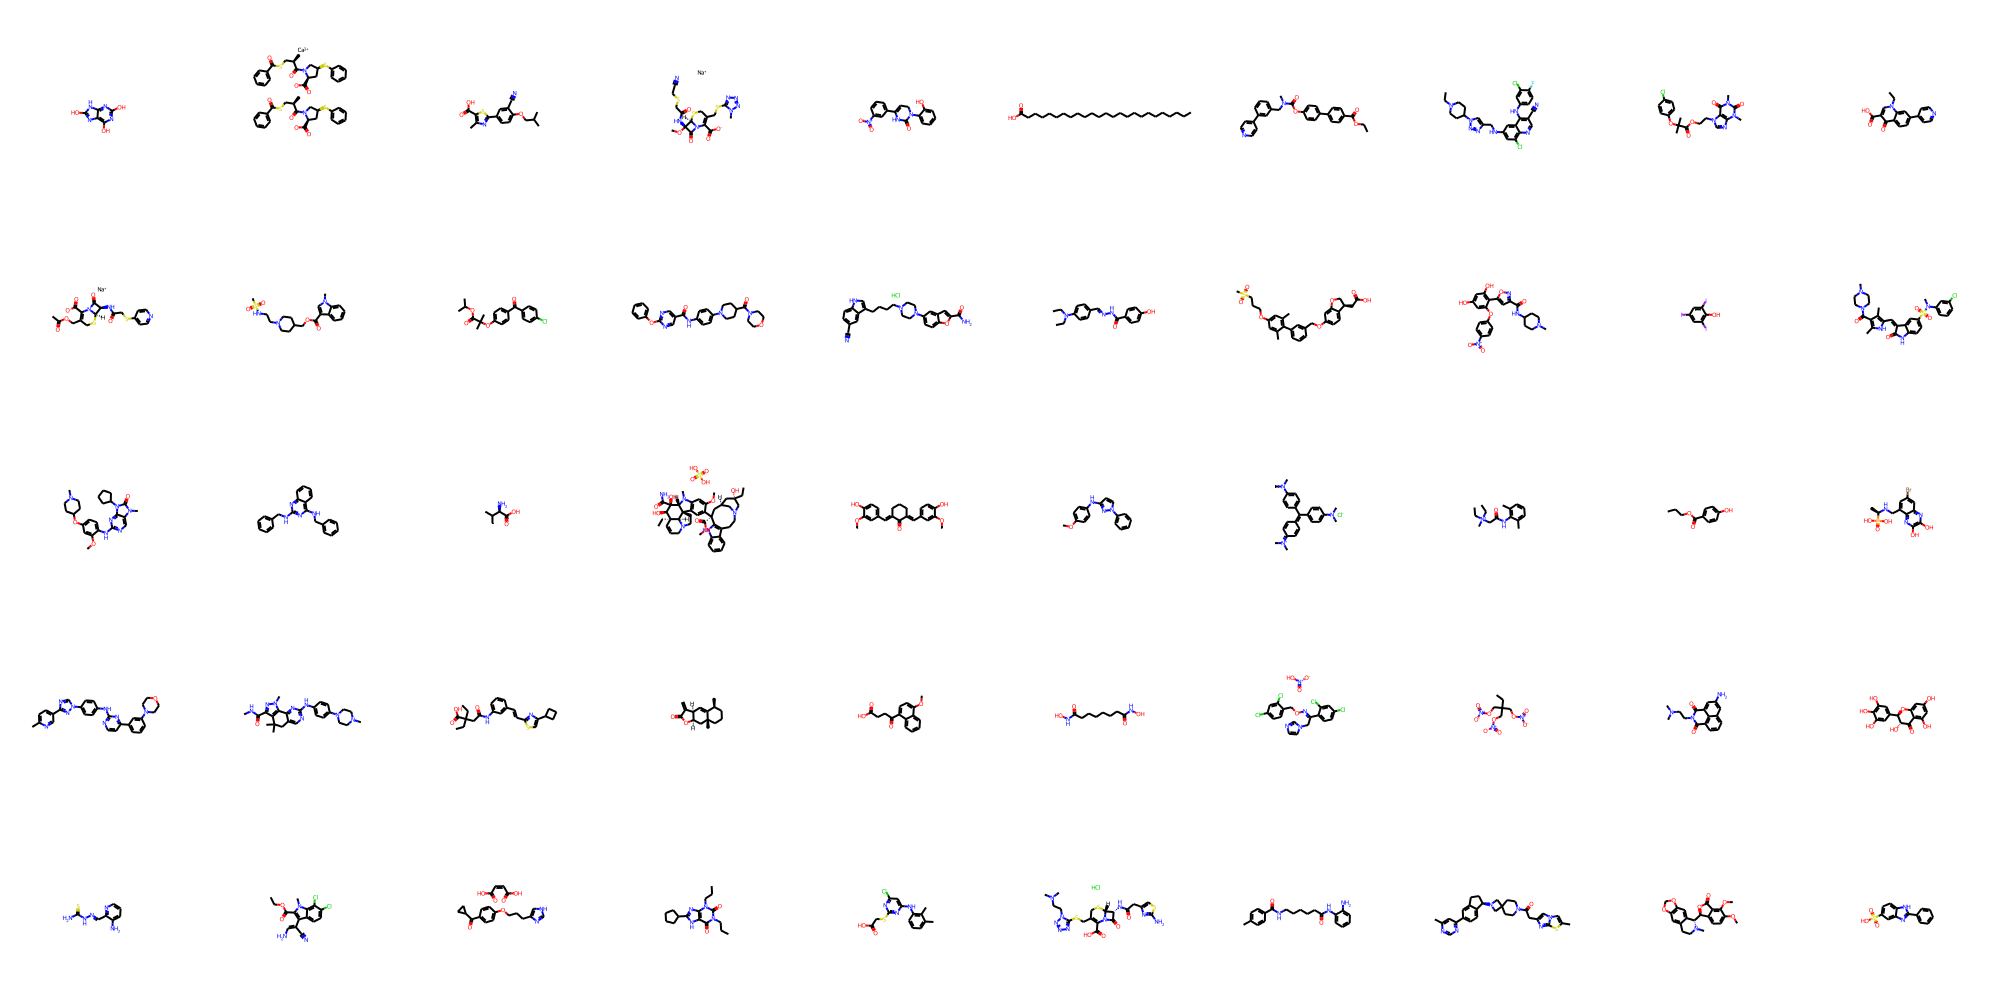

In [7]:
smiles_list = ['Oc1nc(O)c2nc(O)[nH]c2n1',
'C[C@H](CSC(=O)c1ccccc1)C(=O)N1C[C@@H](Sc2ccccc2)C[C@H]1C(=O)[O-].C[C@H](CSC(=O)c1ccccc1)C(=O)N1C[C@@H](Sc2ccccc2)C[C@H]1C(=O)[O-].[Ca+2]',
'Cc1nc(-c2ccc(OCC(C)C)c(C#N)c2)sc1C(=O)O',
'CO[C@@]1(NC(=O)CSCC#N)C(=O)N2C(C(=O)[O-])=C(CSc3nnnn3C)CS[C@@H]21.[Na+]',
'O=C1NC(c2cccc([N+](=O)[O-])c2)=CCN1c1ccccc1O',
'CCCCCCCCCCCCCCCCCCCCCCCCC(=O)O',
'CCOC(=O)c1ccc(-c2ccc(OC(=O)N(C)Cc3cccc(-c4ccncc4)c3)cc2)cc1',
'CCN1CCC(n2cc(CNc3cc(Cl)c4ncc(C#N)c(Nc5ccc(F)c(Cl)c5)c4c3)nn2)CC1',
'Cn1c(=O)c2c(ncn2CCOC(=O)C(C)(C)Oc2ccc(Cl)cc2)n(C)c1=O',
'CCn1cc(C(=O)O)c(=O)c2ccc(-c3ccncc3)cc21',
'CC(=O)OCC1=C(C(=O)[O-])N2C(=O)[C@@H](NC(=O)CSc3ccncc3)[C@H]2SC1.[Na+]',
'Cn1cc(C(=O)OCC2CCN(CCNS(C)(=O)=O)CC2)c2ccccc21',
'CC(C)OC(=O)C(C)(C)Oc1ccc(C(=O)c2ccc(Cl)cc2)cc1',
'O=C(Nc1ccc(N2CCC(C(=O)N3CCOCC3)CC2)cc1)c1cnc(Oc2ccccc2)nc1',
'Cl.N#Cc1ccc2[nH]cc(CCCCN3CCN(c4ccc5oc(C(N)=O)cc5c4)CC3)c2c1',
'CCN(CC)c1ccc(/C=N/NC(=O)c2ccc(O)cc2)cc1',
'Cc1cc(OCCCS(C)(=O)=O)cc(C)c1-c1cccc(COc2ccc3c(c2)OC[C@H]3CC(=O)O)c1',
'CN1CCC(NC(=O)c2cc(-c3c(O)cc(O)cc3Oc3ccc([N+](=O)[O-])cc3)on2)CC1',
'Oc1c(I)cc(I)cc1I',
'Cc1[nH]c(/C=C2\C(=O)Nc3ccc(S(=O)(=O)N(C)c4cccc(Cl)c4)cc32)c(C)c1C(=O)N1CCN(C)CC1',
'COc1cc(OC2CCN(C)CC2)ccc1Nc1ncc2c(n1)n(C1CCCC1)c(=O)n2C',
'c1ccc(CNc2nc(NCc3ccccc3)c3ccccc3n2)cc1',
'CC(C)[C@@H](N)C(=O)O',
'CC[C@]1(O)C[C@H]2CN(CCc3c([nH]c4ccccc34)[C@@](C(=O)OC)(c3cc4c(cc3OC)N(C)[C@H]3[C@@](O)(C(N)=O)[C@H](O)[C@]5(CC)C=CCN6CC[C@]43[C@@H]65)C2)C1.O=S(=O)(O)O',
'COc1cc(/C=C2\CCC/C(=C\c3ccc(O)c(OC)c3)C2=O)ccc1O',
'COc1ccc(Nc2ccn(-c3ccccc3)n2)cc1',
'CN(C)c1ccc(C(=C2C=CC(=[N+](C)C)C=C2)c2ccc(N(C)C)cc2)cc1.[Cl-]',
'CC[N+](C)(CC)CC(=O)Nc1c(C)cccc1C',
'CCCOC(=O)c1ccc(O)cc1',
'C[C@@H](NCc1cc(Br)cc2nc(O)c(O)nc12)P(=O)(O)O',
'Cc1ccc(-c2ncn(-c3ccc(Nc4nccc(-c5cccc(N6CCOCC6)c5)n4)cc3)n2)cn1',
'CNC(=O)c1nn(C)c2c1C(C)(C)Cc1cnc(Nc3ccc(N4CCN(C)CC4)cc3)nc1-2',
'CCC(CC)(CC(=O)Nc1cccc(/C=C/c2nc(C3CCC3)cs2)c1)C(=O)O',
'C=C1C(=O)O[C@@H]2C[C@@]3(C)CCC[C@H](C)C3=C[C@H]12',
'COc1ccc(C(=O)CCC(=O)O)c2ccccc12',
'O=C(CCCCCCC(=O)NO)NO',
'Clc1ccc(CO/N=C(\Cn2ccnc2)c2ccc(Cl)cc2Cl)c(Cl)c1.O=[N+]([O-])O',
'CCC(CO[N+](=O)[O-])(CO[N+](=O)[O-])CO[N+](=O)[O-]',
'CN(C)CCN1C(=O)c2cccc3cc(N)cc(c23)C1=O',
'O=C1c2c(O)cc(O)cc2O[C@H](c2cc(O)c(O)c(O)c2)[C@H]1O',
'NC(=S)N/N=C/c1ncccc1N',
'CCOC(=O)c1c(/C(C#N)=CN)c2ccc(Cl)c(Cl)c2n1C',
'O=C(O)/C=C\C(=O)O.O=C(c1ccc(OCCCc2c[nH]cn2)cc1)C1CC1',
'CCCn1c(=O)c2[nH]c(C3CCCC3)nc2n(CCC)c1=O',
'Cc1cccc(Nc2cc(Cl)nc(SCC(=O)O)n2)c1C',
'CN(C)CCn1nnnc1SCC1=C(C(=O)O)N2C(=O)[C@@H](NC(=O)Cc3csc(N)n3)[C@H]2SC1.Cl',
'Cc1ccc(C(=O)NCCCCCC(=O)Nc2ccccc2N)cc1',
'Cc1cc(-c2ccc3c(c2)CC[C@H]3N2CC3(CCN(C(=O)Cc4cn5cc(C)sc5n4)CC3)C2)ncn1',
'COc1ccc2c(c1OC)C(=O)O[C@@H]2[C@H]1c2cc3c(cc2CCN1C)OCO3',
'O=S(=O)(O)c1ccc2[nH]c(-c3ccccc3)nc2c1'
]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



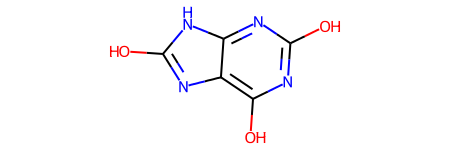

In [8]:
M1 = mol_list [0]
M1

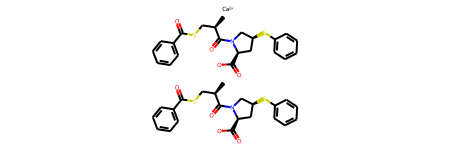

In [9]:
M2 = mol_list [1]
M2

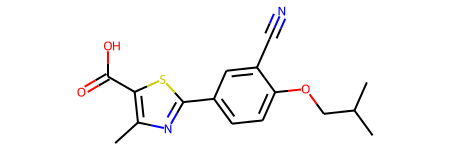

In [10]:
M3 = mol_list [2]
M3

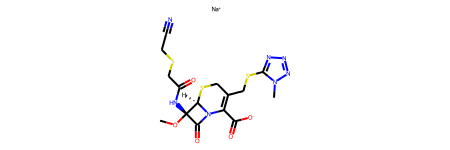

In [11]:
M4 = mol_list [3]
M4

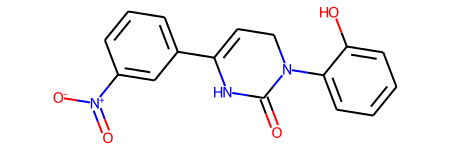

In [12]:
M5 = mol_list [4]
M5

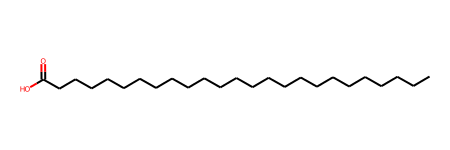

In [13]:
M6 = mol_list [5]
M6

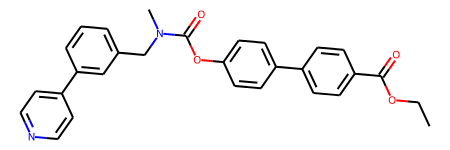

In [14]:
M7 = mol_list [6]
M7

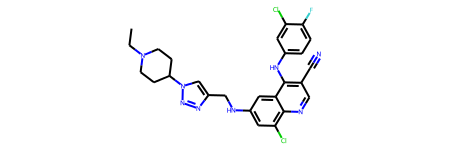

In [15]:
M8 = mol_list [7]
M8

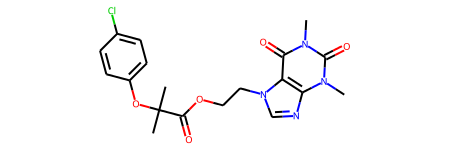

In [16]:
M9 = mol_list [8]
M9

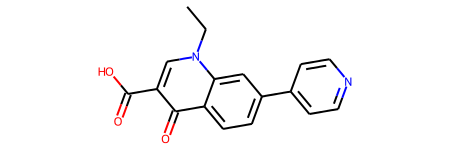

In [17]:
M10= mol_list [9]
M10

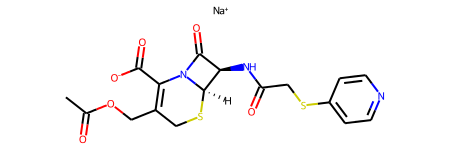

In [18]:
M11= mol_list [10]
M11

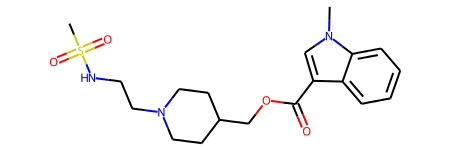

In [19]:
M12= mol_list [11]
M12

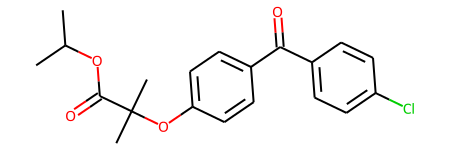

In [20]:
M13= mol_list [12]
M13

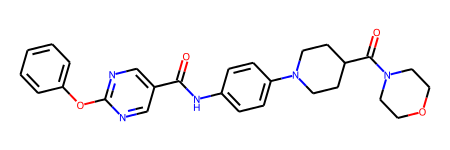

In [21]:
M14= mol_list [13]
M14

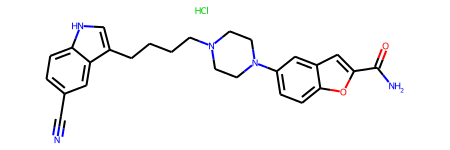

In [22]:
M15= mol_list [14]
M15

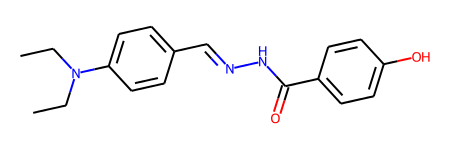

In [23]:
M16= mol_list [15]
M16

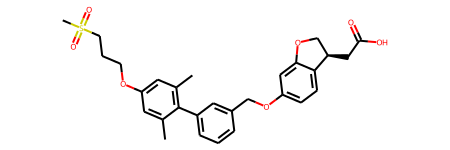

In [24]:
M17= mol_list [16]
M17

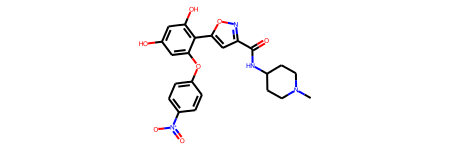

In [25]:
M18= mol_list [17]
M18

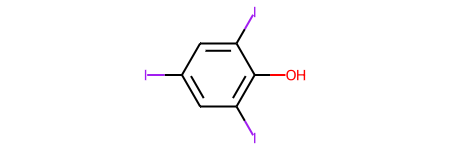

In [26]:
M19= mol_list [18]
M19

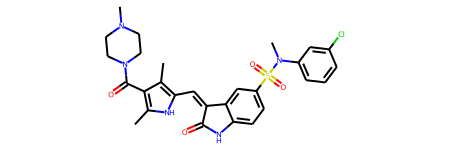

In [27]:
M20= mol_list [19]
M20

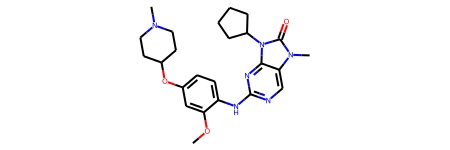

In [28]:
M21= mol_list [20]
M21

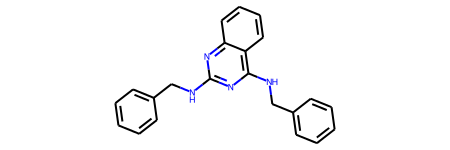

In [29]:
M22= mol_list [21]
M22

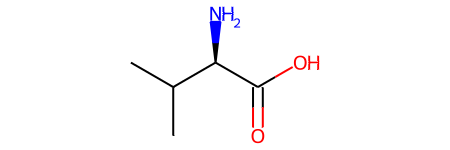

In [30]:
M23= mol_list [22]
M23

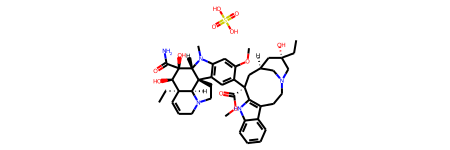

In [31]:
M24= mol_list [23]
M24

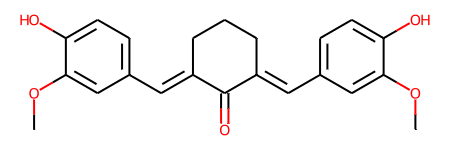

In [32]:
M25= mol_list [24]
M25

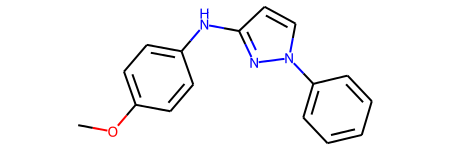

In [33]:
M26= mol_list [25]
M26

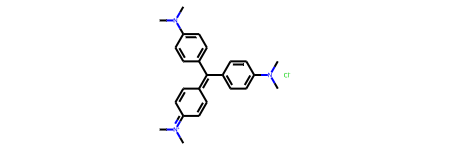

In [34]:
M27= mol_list [26]
M27

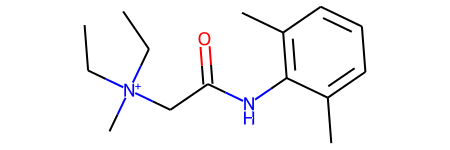

In [35]:
M28= mol_list [27]
M28

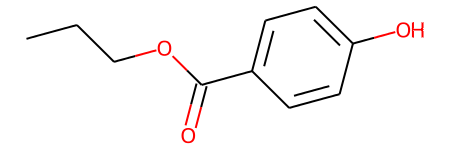

In [36]:
M29= mol_list [28]
M29

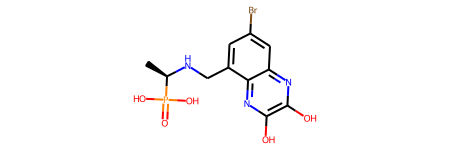

In [37]:
M30= mol_list [29]
M30

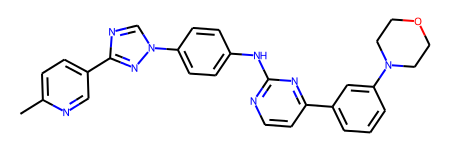

In [38]:
M31= mol_list [30]
M31

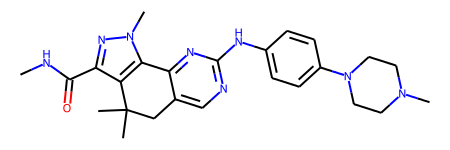

In [39]:
M32= mol_list [31]
M32

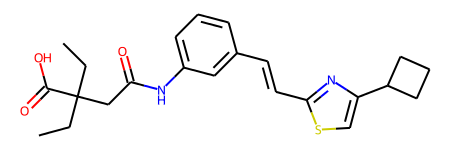

In [40]:
M33= mol_list [32]
M33

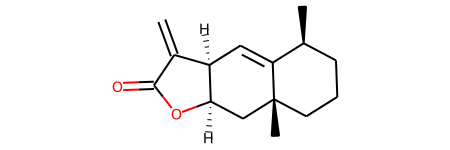

In [41]:
M34= mol_list [33]
M34

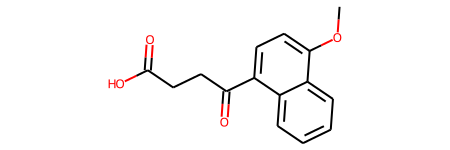

In [42]:
M35= mol_list [34]
M35

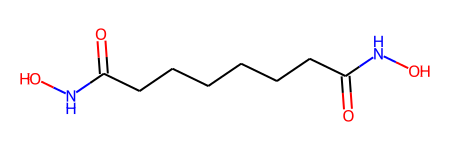

In [43]:
M36= mol_list [35]
M36

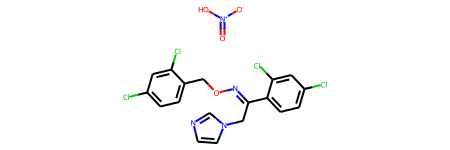

In [44]:
M37= mol_list [36]
M37

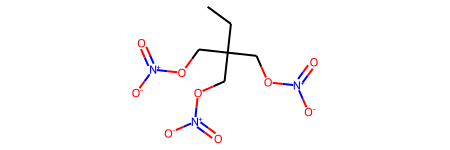

In [45]:
M38= mol_list [37]
M38


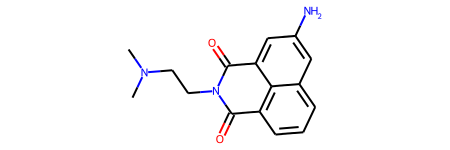

In [46]:
M39= mol_list [38]
M39

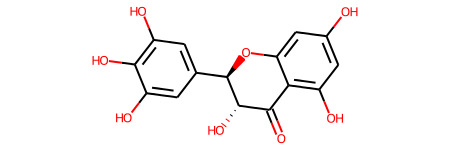

In [47]:
M40= mol_list [39]
M40

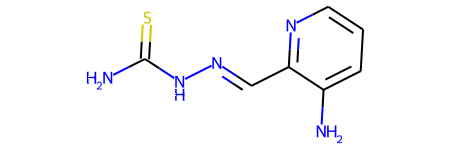

In [48]:
M41= mol_list [40]
M41

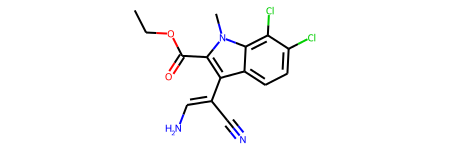

In [49]:
M42= mol_list [41]
M42

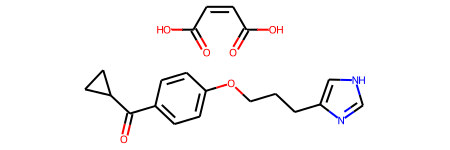

In [50]:
M43= mol_list [42]
M43

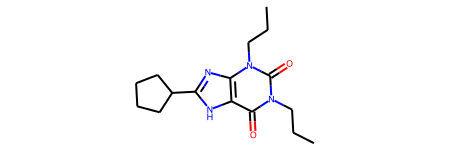

In [51]:
M44= mol_list [43]
M44

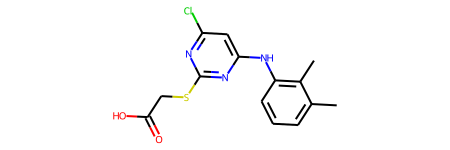

In [52]:
M45= mol_list [44]
M45

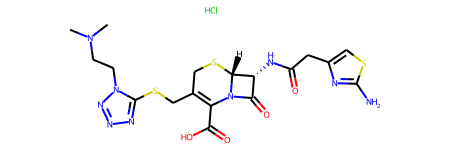

In [53]:
M46= mol_list [45]
M46

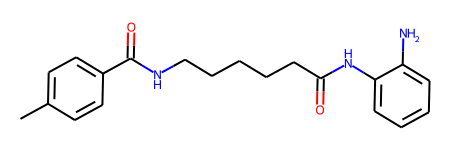

In [54]:
M47= mol_list [46]
M47

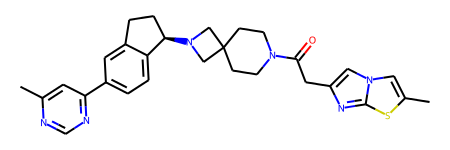

In [55]:
M48= mol_list [47]
M48

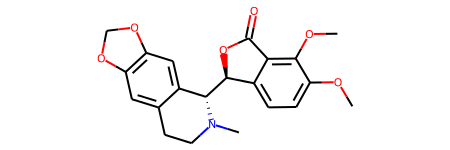

In [56]:
M49= mol_list [48]
M49

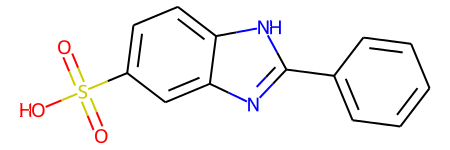

In [57]:
M50= mol_list [49]
M50

In [58]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[90,
 100,
 106,
 112,
 128,
 356,
 378,
 416,
 446,
 578,
 604,
 700,
 721,
 807,
 831,
 848,
 860,
 897,
 938,
 989,
 1000]

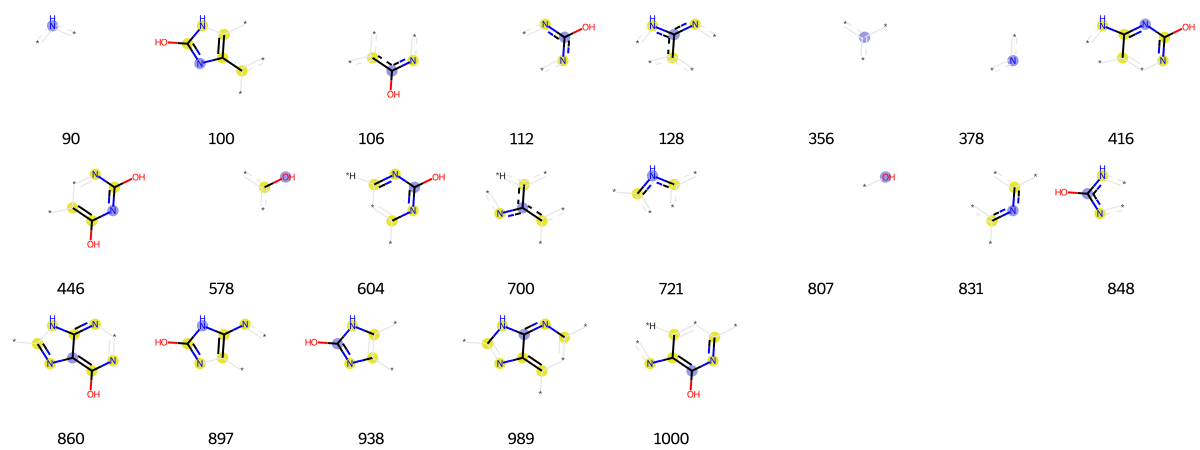

In [59]:
prints = [(M1, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp.GetOnBits ()])

In [60]:
bi = {}

fp2= AllChem.GetMorganFingerprintAsBitVect(M2, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[90,
 100,
 106,
 112,
 128,
 356,
 378,
 416,
 446,
 578,
 604,
 700,
 721,
 807,
 831,
 848,
 860,
 897,
 938,
 989,
 1000]

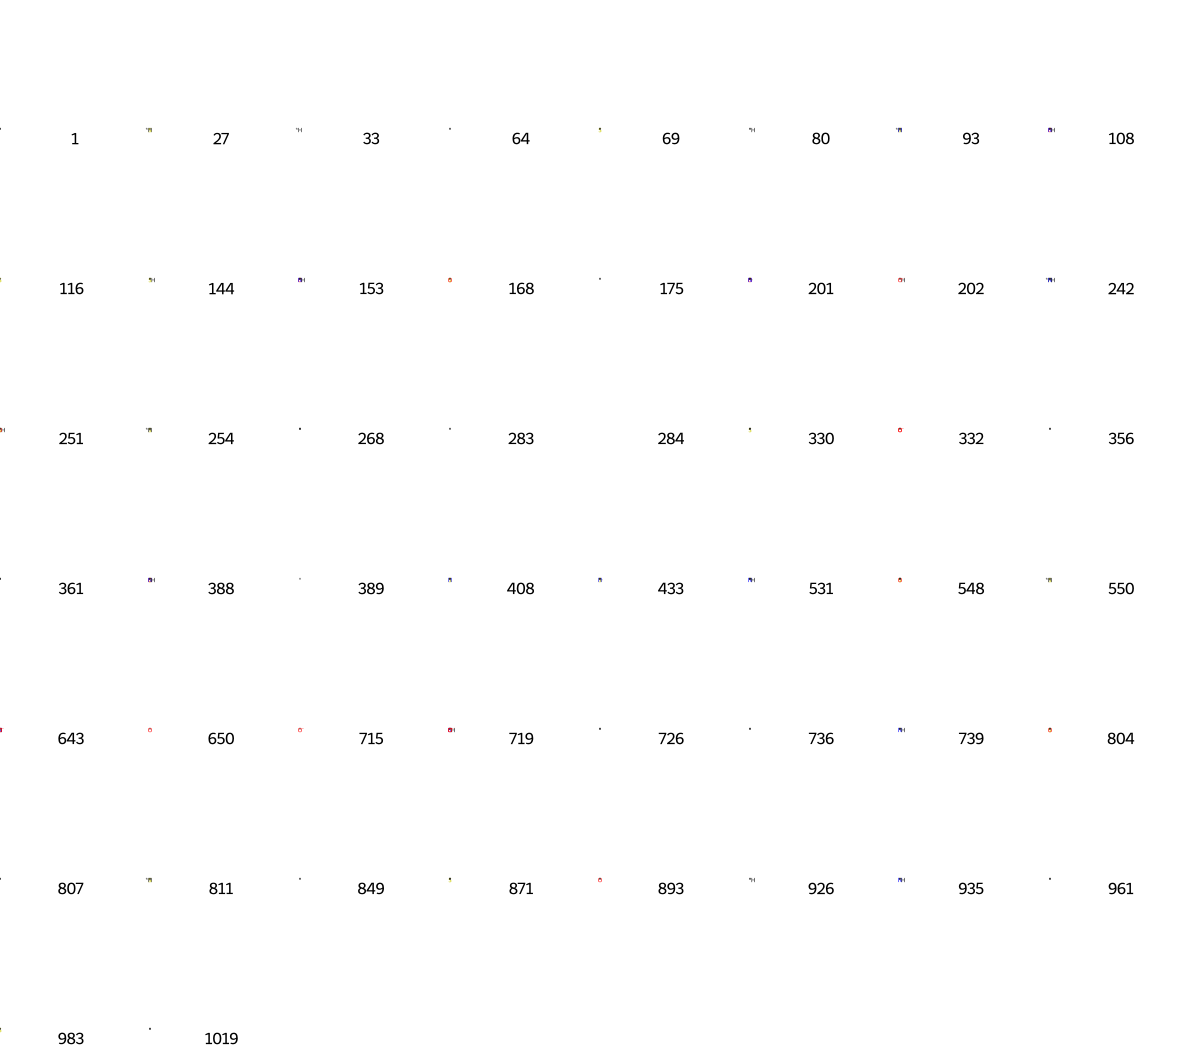

In [61]:
prints = [(M2, x, bi) for x in fp2.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp2.GetOnBits ()])

In [62]:
bi = {}

fp3= AllChem.GetMorganFingerprintAsBitVect(M3, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp3, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[1,
 33,
 80,
 92,
 94,
 111,
 112,
 118,
 136,
 162,
 186,
 194,
 254,
 266,
 283,
 325,
 329,
 356,
 360,
 361,
 375,
 378,
 389,
 400,
 406,
 428,
 456,
 539,
 650,
 674,
 675,
 695,
 698,
 726,
 770,
 781,
 790,
 807,
 823,
 831,
 838,
 849,
 875,
 893,
 896,
 910,
 925,
 946]

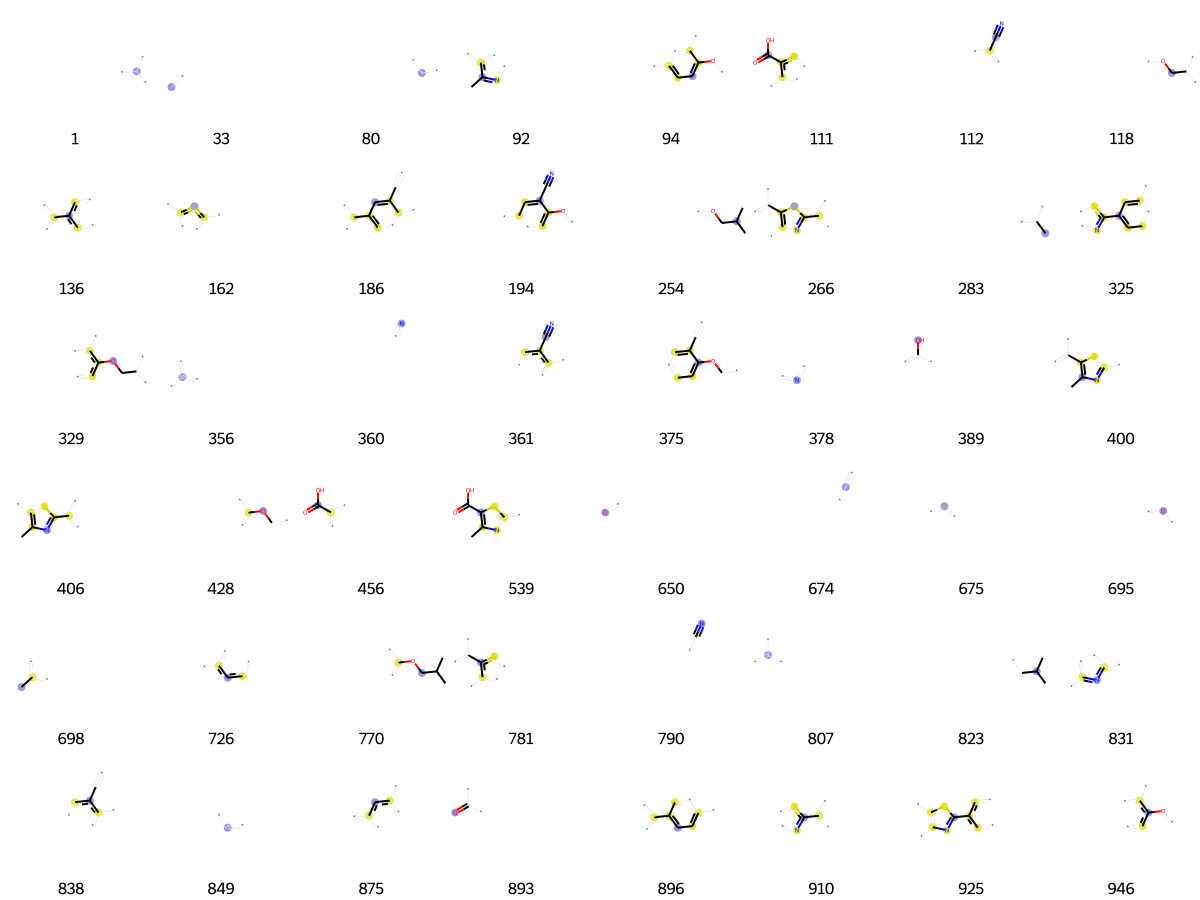

In [63]:
prints = [(M3, x, bi) for x in fp3.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp3.GetOnBits ()])

In [64]:
bi = {}

fp4= AllChem.GetMorganFingerprintAsBitVect(M4, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp4, fp_arr)
np.nonzero(fp_arr)
list(fp4.GetOnBits())

[19,
 33,
 36,
 41,
 65,
 80,
 81,
 89,
 116,
 121,
 128,
 136,
 140,
 172,
 186,
 189,
 195,
 202,
 243,
 255,
 257,
 259,
 264,
 280,
 314,
 329,
 341,
 344,
 356,
 360,
 378,
 399,
 464,
 470,
 517,
 544,
 548,
 566,
 586,
 590,
 614,
 647,
 650,
 674,
 675,
 695,
 715,
 723,
 747,
 759,
 762,
 790,
 807,
 814,
 824,
 841,
 859,
 872,
 882,
 893,
 898,
 899,
 926,
 935,
 953,
 960,
 983,
 998,
 1019]

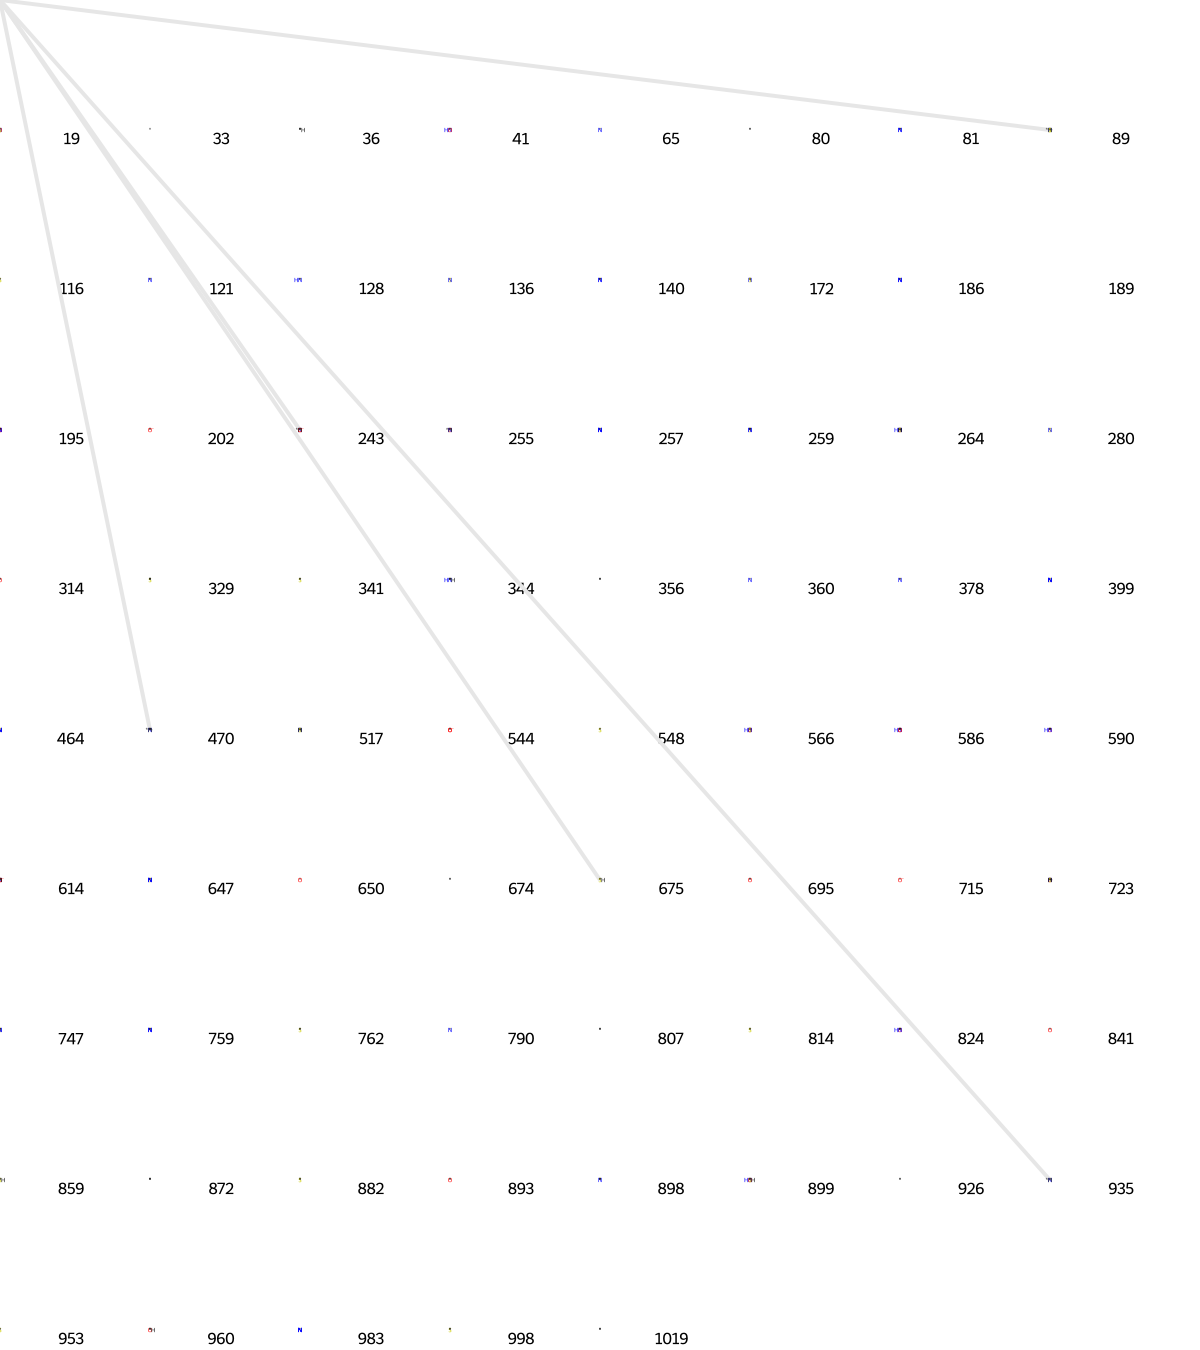

In [65]:
prints = [(M4, x, bi) for x in fp4.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp4.GetOnBits ()])

In [66]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[15,
 36,
 64,
 90,
 136,
 151,
 171,
 175,
 176,
 218,
 250,
 271,
 309,
 314,
 356,
 433,
 515,
 552,
 578,
 583,
 586,
 623,
 637,
 650,
 715,
 726,
 736,
 753,
 755,
 757,
 776,
 785,
 807,
 838,
 849,
 875,
 889,
 916,
 926,
 935,
 939,
 1011]

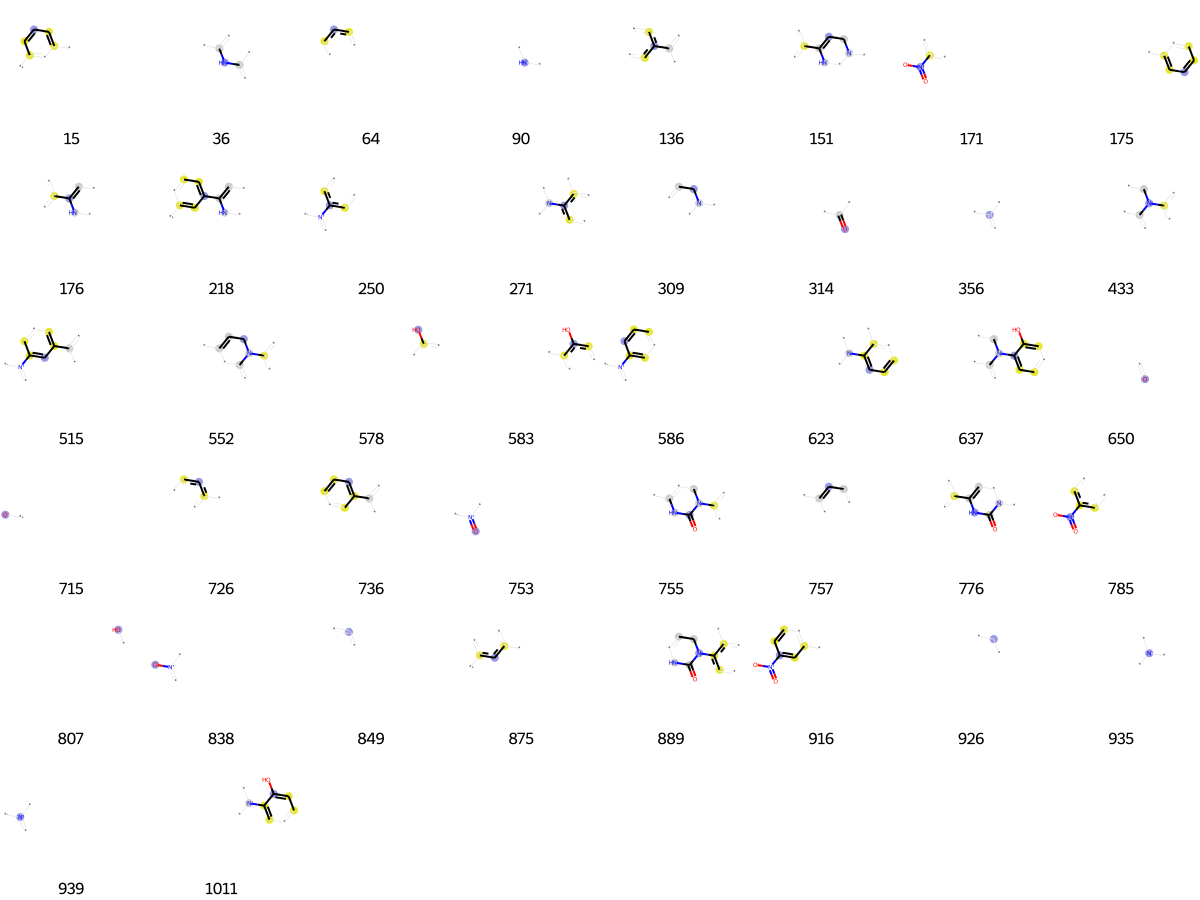

In [67]:
prints = [(M5, x, bi) for x in fp5.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp5.GetOnBits ()])

In [68]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

[33,
 80,
 86,
 119,
 243,
 263,
 294,
 389,
 420,
 540,
 591,
 650,
 713,
 794,
 807,
 887,
 893]

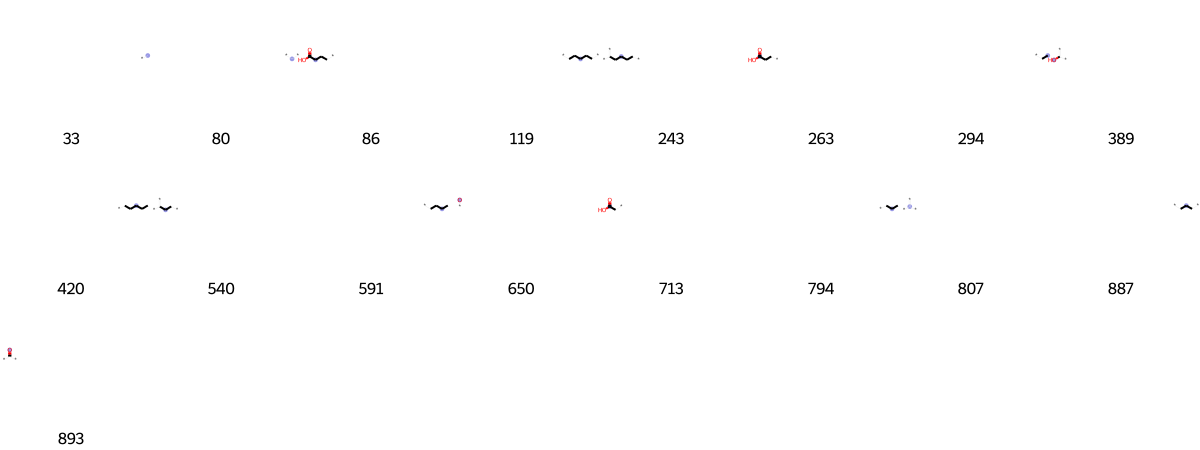

In [69]:
prints = [(M6, x, bi) for x in fp6.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp6.GetOnBits ()])

In [70]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[14,
 15,
 33,
 42,
 64,
 80,
 116,
 136,
 139,
 145,
 147,
 184,
 196,
 214,
 217,
 239,
 294,
 322,
 334,
 356,
 361,
 378,
 383,
 422,
 481,
 498,
 507,
 552,
 579,
 606,
 650,
 673,
 695,
 698,
 705,
 718,
 726,
 730,
 736,
 759,
 785,
 807,
 842,
 849,
 875,
 881,
 893,
 896,
 940,
 976]

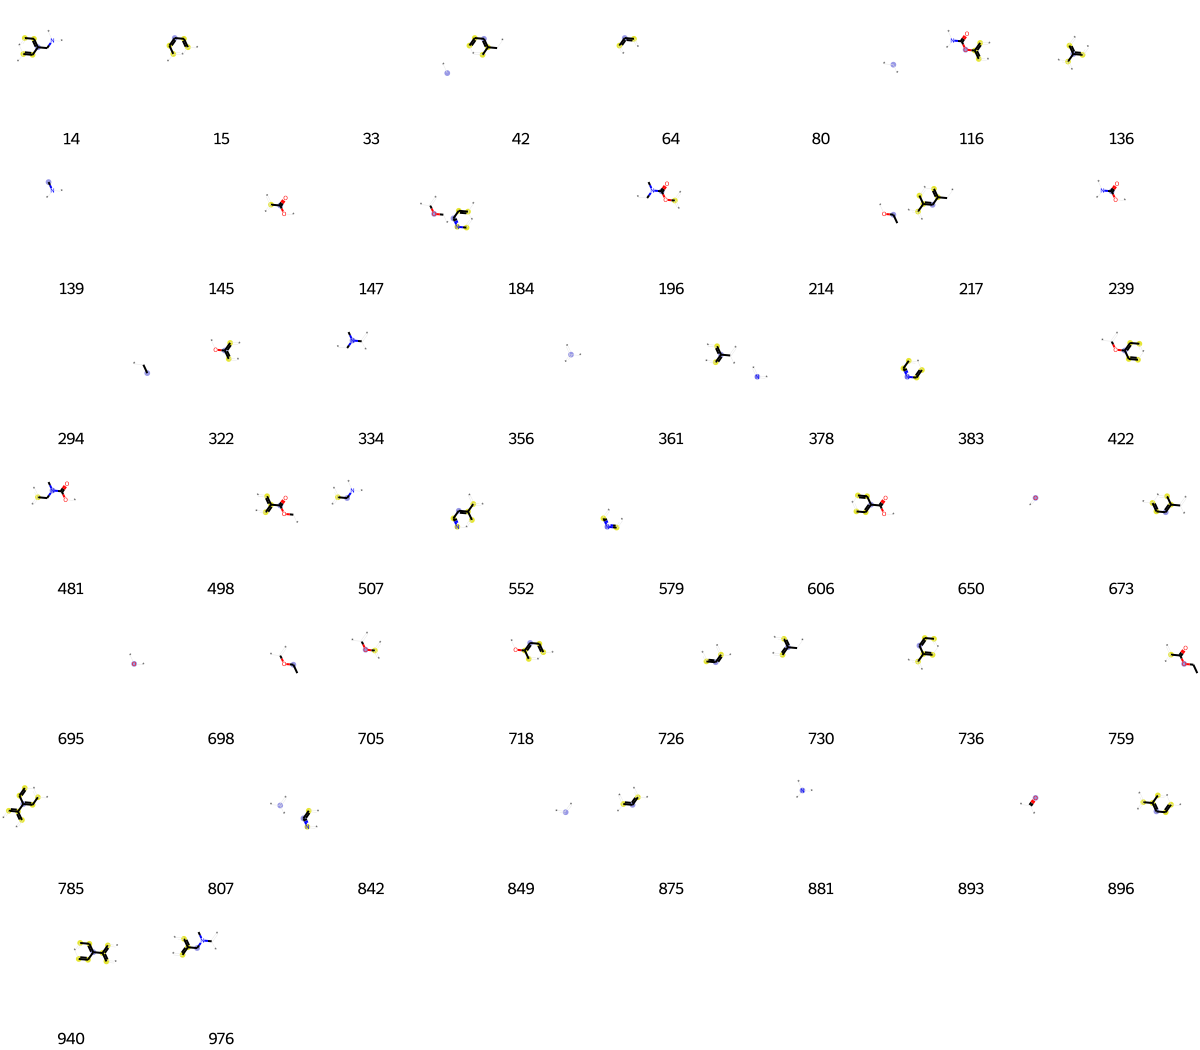

In [71]:
prints = [(M7, x, bi) for x in fp7.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp7.GetOnBits ()])

In [72]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[33,
 34,
 58,
 80,
 86,
 87,
 112,
 128,
 140,
 191,
 216,
 237,
 255,
 265,
 294,
 295,
 301,
 329,
 332,
 333,
 350,
 356,
 360,
 361,
 366,
 378,
 381,
 392,
 428,
 456,
 458,
 464,
 465,
 474,
 488,
 491,
 507,
 511,
 557,
 561,
 564,
 659,
 674,
 699,
 700,
 716,
 724,
 726,
 759,
 767,
 777,
 790,
 816,
 827,
 838,
 843,
 847,
 848,
 849,
 850,
 865,
 875,
 886,
 904,
 922,
 926,
 935,
 965,
 980,
 1019]

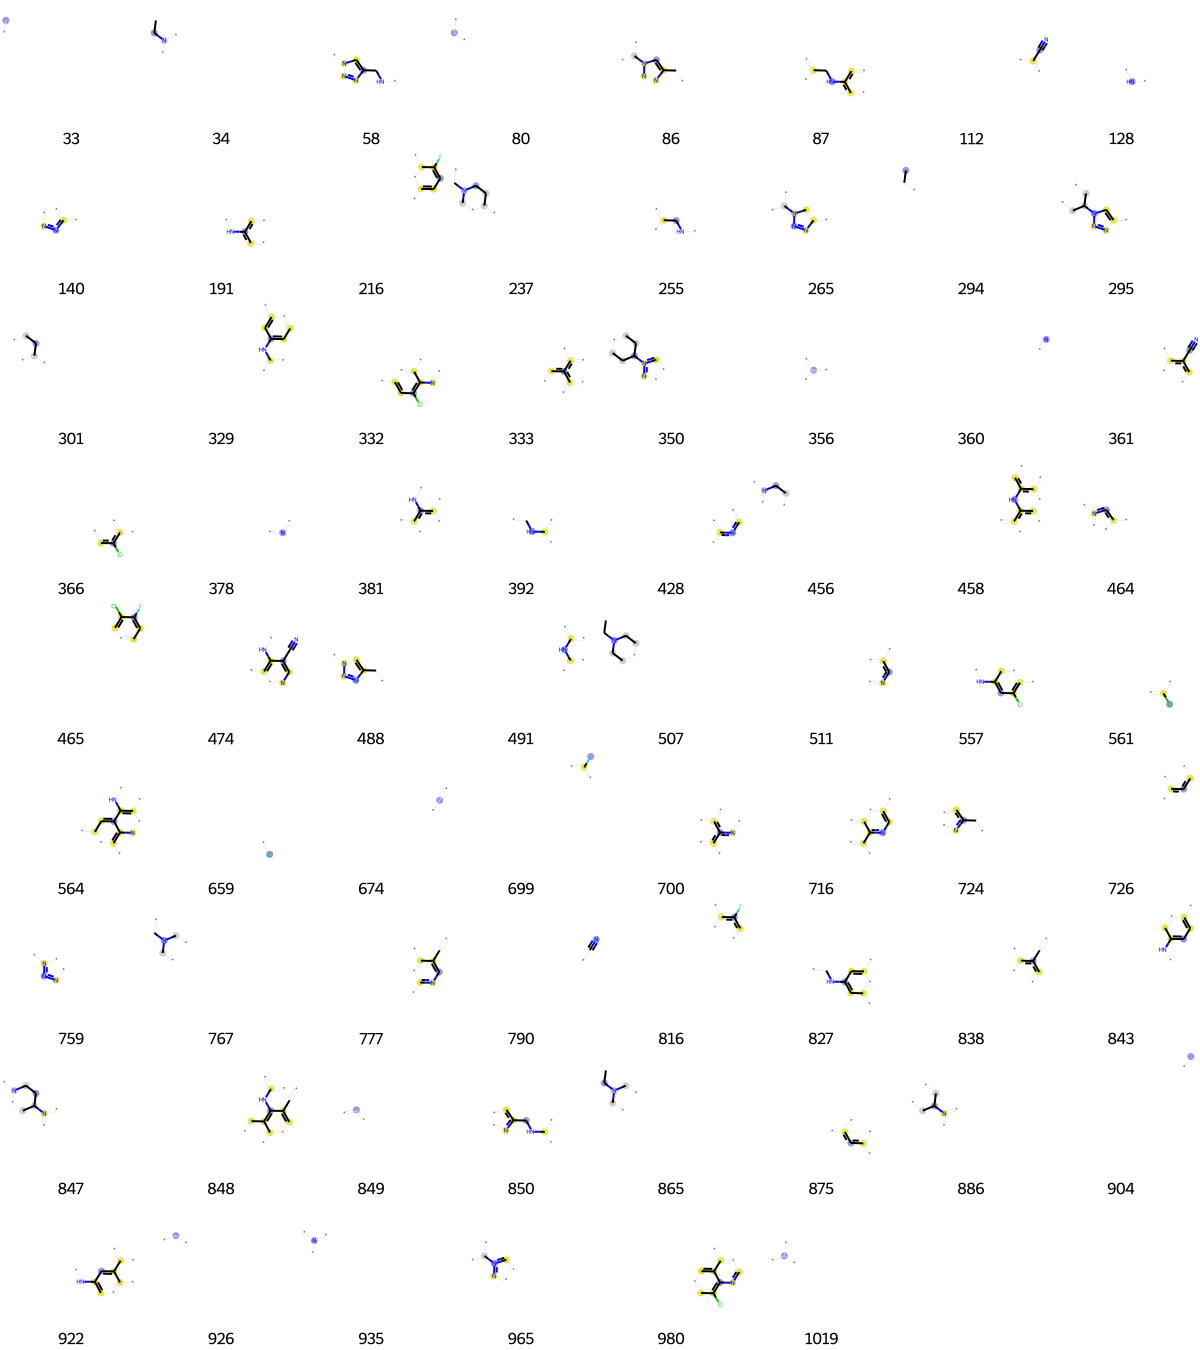

In [73]:
prints = [(M8, x, bi) for x in fp8.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp8.GetOnBits ()])

In [74]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[0,
 13,
 33,
 46,
 70,
 79,
 80,
 114,
 121,
 147,
 179,
 183,
 216,
 234,
 283,
 314,
 317,
 322,
 351,
 356,
 378,
 392,
 400,
 401,
 416,
 420,
 428,
 431,
 504,
 510,
 548,
 561,
 564,
 574,
 650,
 659,
 672,
 695,
 711,
 718,
 726,
 770,
 771,
 807,
 816,
 849,
 893,
 932,
 934,
 935]

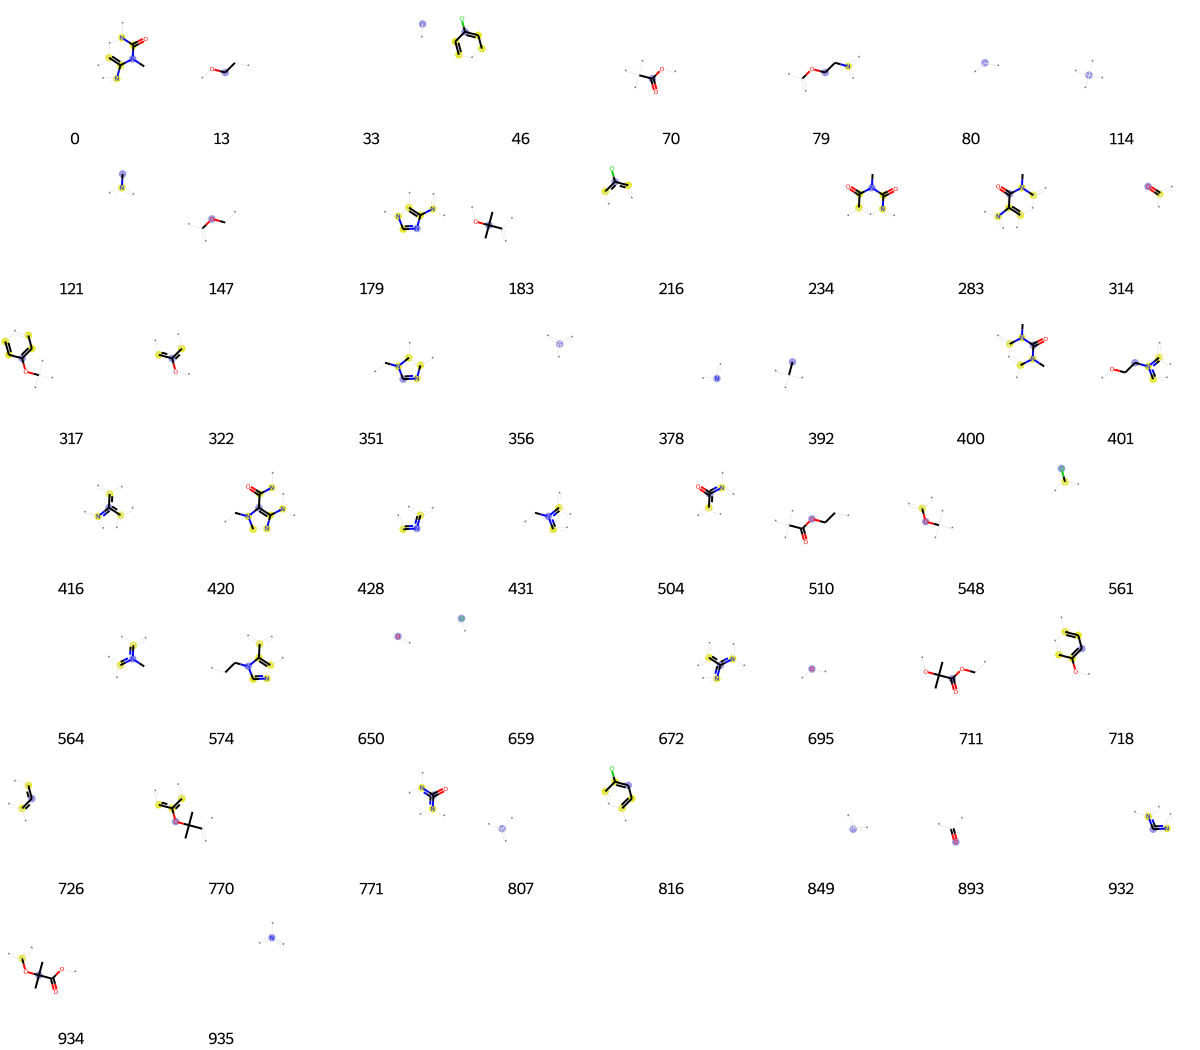

In [75]:
prints = [(M9, x, bi) for x in fp9.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp9.GetOnBits ()])

In [76]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

[23,
 33,
 34,
 45,
 61,
 80,
 136,
 184,
 213,
 294,
 314,
 333,
 356,
 378,
 383,
 389,
 429,
 431,
 453,
 456,
 464,
 490,
 505,
 525,
 551,
 552,
 579,
 650,
 705,
 709,
 726,
 785,
 807,
 842,
 849,
 875,
 893,
 896,
 935,
 940,
 967]

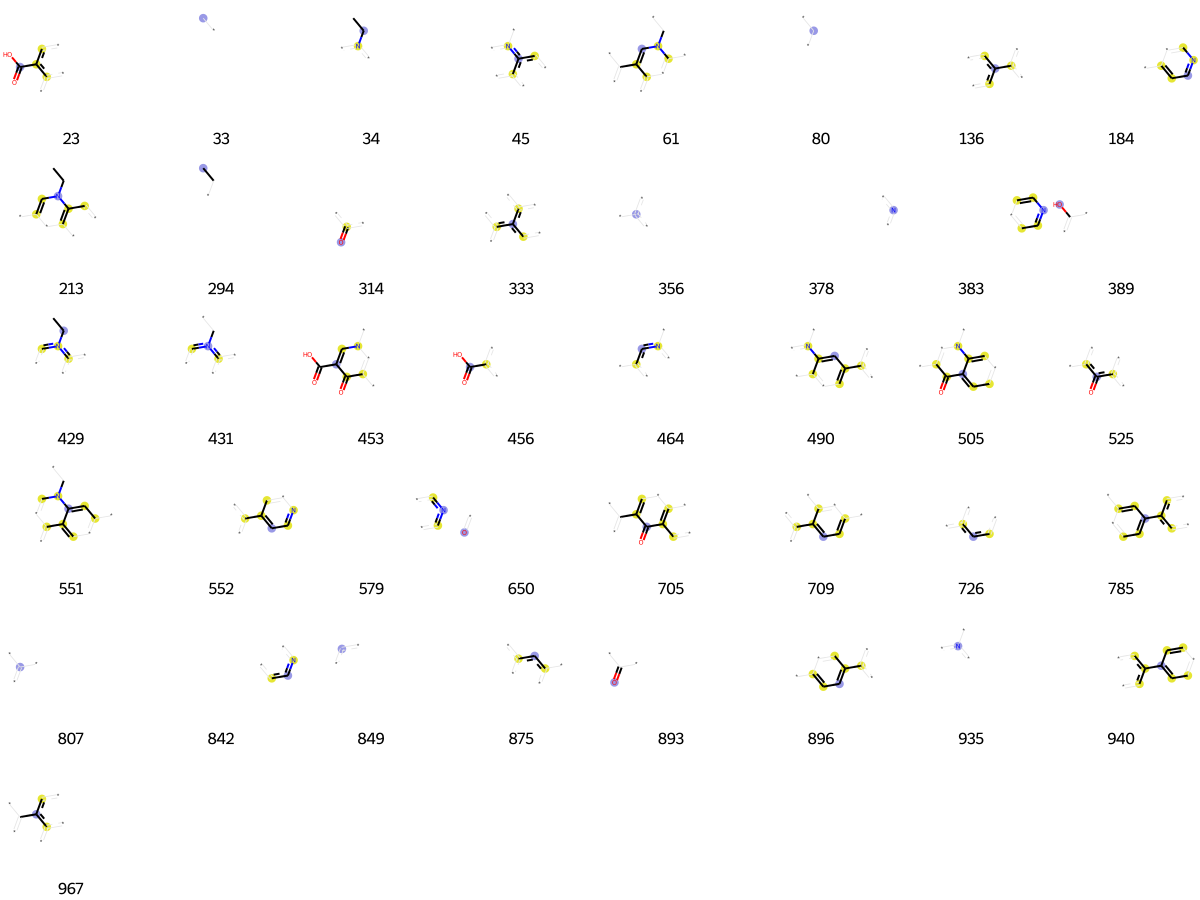

In [77]:
prints = [(M10, x, bi) for x in fp10.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp10.GetOnBits ()])

In [78]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[5,
 11,
 33,
 39,
 41,
 61,
 80,
 116,
 128,
 147,
 184,
 189,
 202,
 203,
 233,
 243,
 255,
 314,
 341,
 356,
 377,
 378,
 383,
 387,
 417,
 470,
 482,
 484,
 516,
 544,
 579,
 614,
 650,
 675,
 692,
 695,
 698,
 715,
 726,
 745,
 753,
 762,
 784,
 807,
 811,
 842,
 846,
 849,
 859,
 872,
 882,
 893,
 898,
 926,
 935,
 998,
 1008,
 1017,
 1019]

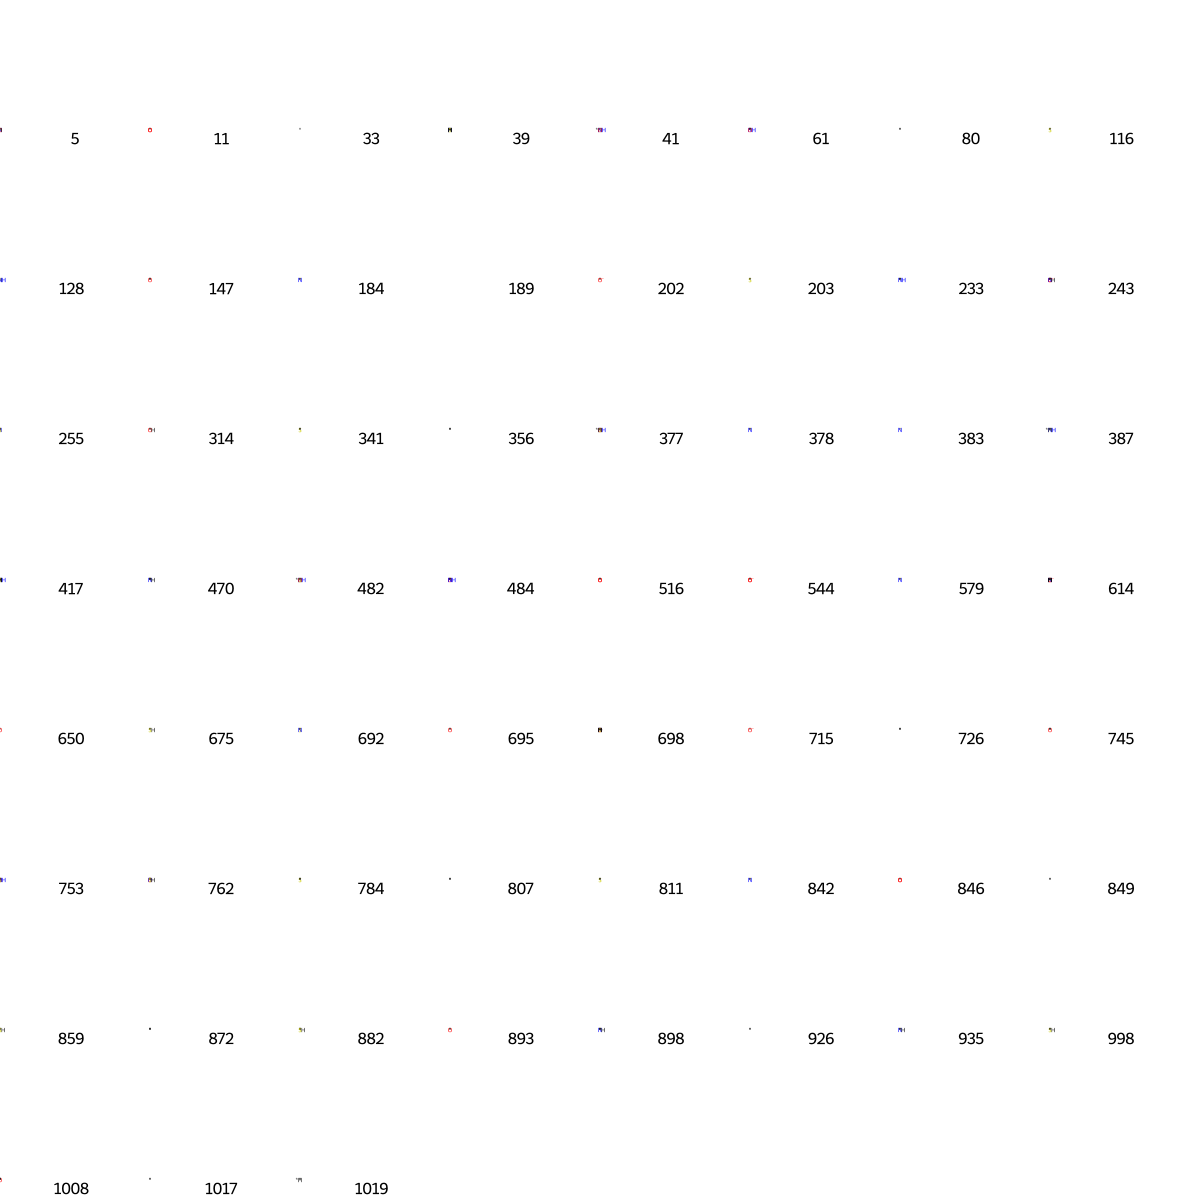

In [79]:
prints = [(M11, x, bi) for x in fp11.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp11.GetOnBits ()])

In [80]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

[11,
 29,
 33,
 42,
 45,
 47,
 64,
 80,
 112,
 121,
 128,
 145,
 147,
 175,
 221,
 235,
 237,
 261,
 286,
 301,
 333,
 350,
 356,
 385,
 409,
 424,
 452,
 456,
 458,
 464,
 511,
 549,
 602,
 649,
 650,
 667,
 692,
 695,
 714,
 726,
 729,
 767,
 777,
 800,
 807,
 849,
 859,
 893,
 926,
 935,
 967,
 1019]

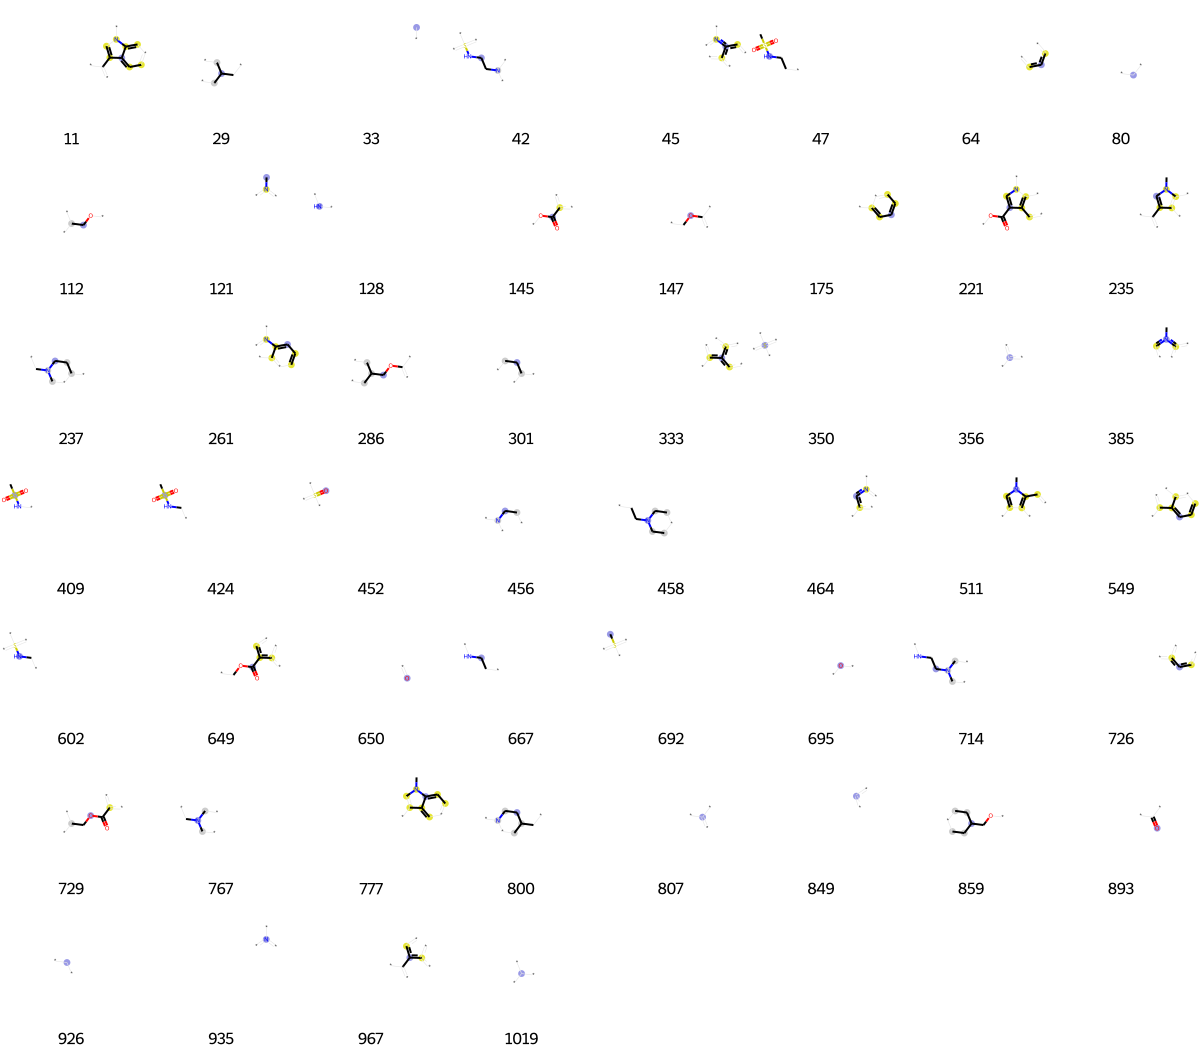

In [81]:
prints = [(M12, x, bi) for x in fp12.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp12.GetOnBits ()])

In [82]:
bi = {}

fp13= AllChem.GetMorganFingerprintAsBitVect(M13, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp13, fp_arr)
np.nonzero(fp_arr)
list(fp13.GetOnBits())

[1,
 9,
 33,
 46,
 69,
 70,
 105,
 114,
 183,
 216,
 283,
 317,
 322,
 356,
 361,
 392,
 545,
 548,
 561,
 585,
 603,
 650,
 659,
 673,
 695,
 718,
 726,
 751,
 770,
 807,
 816,
 849,
 893,
 934,
 954]

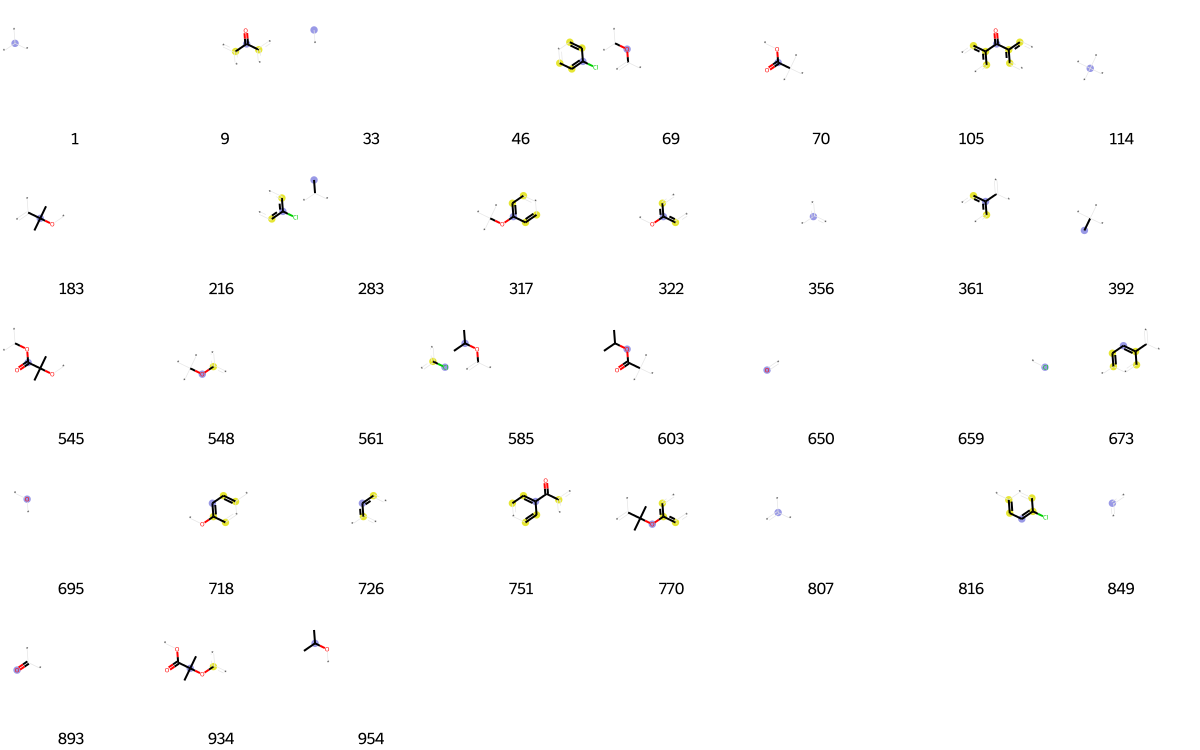

In [83]:
prints = [(M13, x, bi) for x in fp13.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp13.GetOnBits ()])

In [84]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

[11,
 53,
 64,
 128,
 175,
 191,
 193,
 233,
 246,
 301,
 322,
 326,
 335,
 356,
 361,
 371,
 378,
 381,
 389,
 391,
 407,
 417,
 428,
 454,
 456,
 486,
 511,
 523,
 562,
 593,
 629,
 650,
 656,
 687,
 695,
 726,
 744,
 771,
 792,
 798,
 801,
 807,
 813,
 843,
 849,
 893,
 926,
 935,
 950,
 954,
 974,
 985,
 1019]

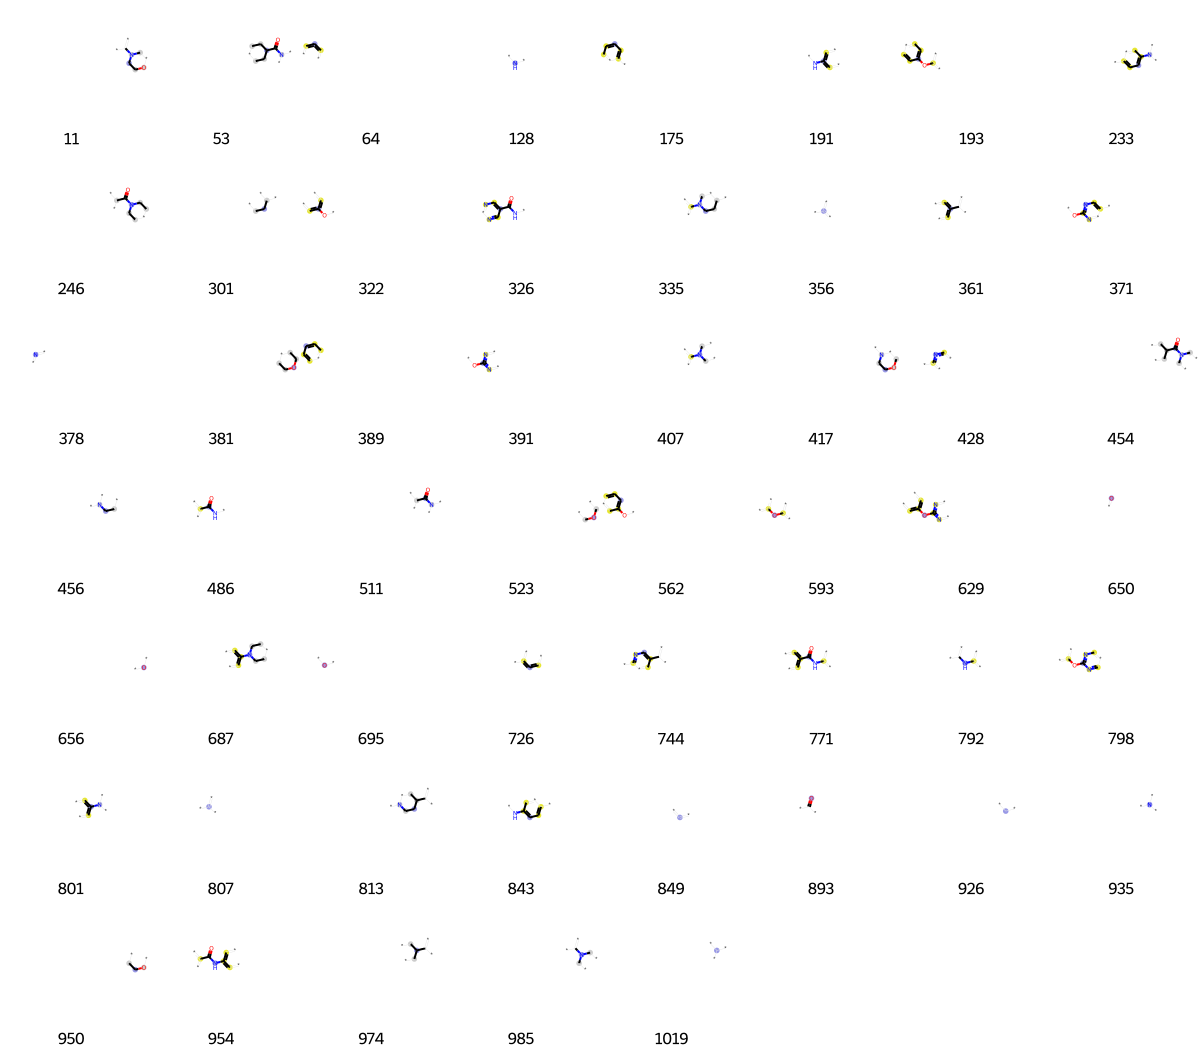

In [85]:
prints = [(M14, x, bi) for x in fp14.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp14.GetOnBits ()])

In [86]:
bi = {}

fp15= AllChem.GetMorganFingerprintAsBitVect(M15, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp15, fp_arr)
np.nonzero(fp_arr)
list(fp15.GetOnBits())

[74,
 80,
 90,
 102,
 105,
 112,
 119,
 121,
 140,
 147,
 160,
 219,
 233,
 305,
 309,
 325,
 328,
 333,
 356,
 360,
 364,
 407,
 422,
 456,
 458,
 476,
 484,
 496,
 503,
 514,
 580,
 650,
 653,
 656,
 674,
 677,
 687,
 726,
 728,
 730,
 740,
 767,
 784,
 786,
 790,
 801,
 806,
 807,
 831,
 849,
 855,
 875,
 887,
 888,
 893,
 913,
 915,
 926,
 930,
 935,
 942,
 951]

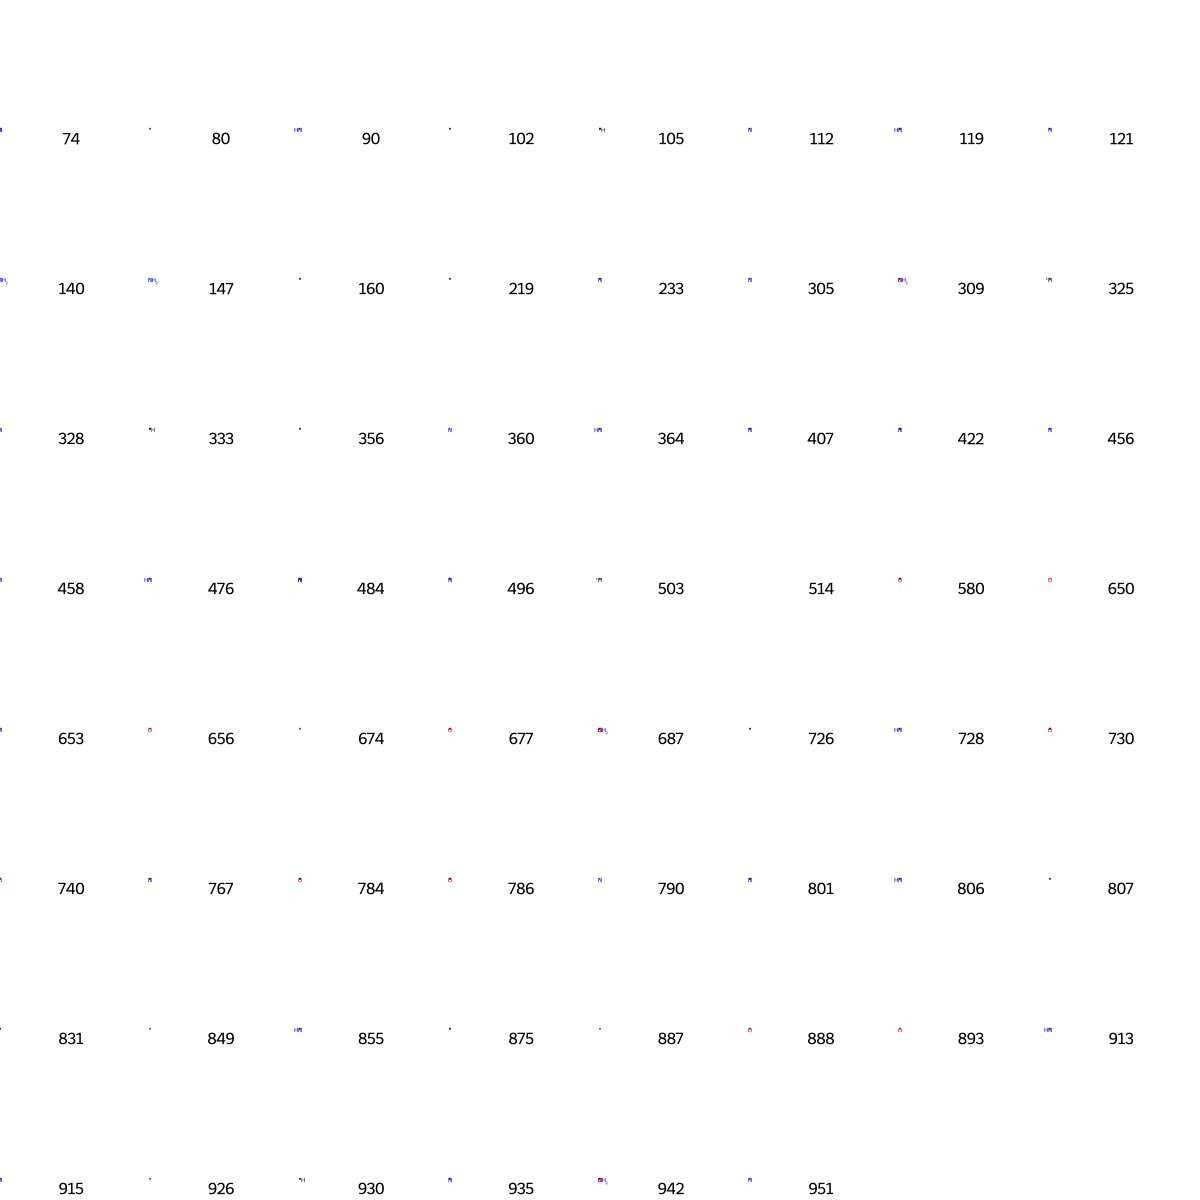

In [87]:
prints = [(M15, x, bi) for x in fp15.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp15.GetOnBits ()])

In [88]:
bi = {}

fp16= AllChem.GetMorganFingerprintAsBitVect(M16, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp16, fp_arr)
np.nonzero(fp_arr)
list(fp16.GetOnBits())

[25,
 33,
 53,
 72,
 80,
 128,
 180,
 270,
 289,
 294,
 309,
 318,
 356,
 361,
 386,
 486,
 578,
 641,
 650,
 663,
 673,
 694,
 725,
 726,
 745,
 754,
 807,
 843,
 849,
 864,
 881,
 893,
 924,
 932,
 960,
 968,
 1009,
 1023]

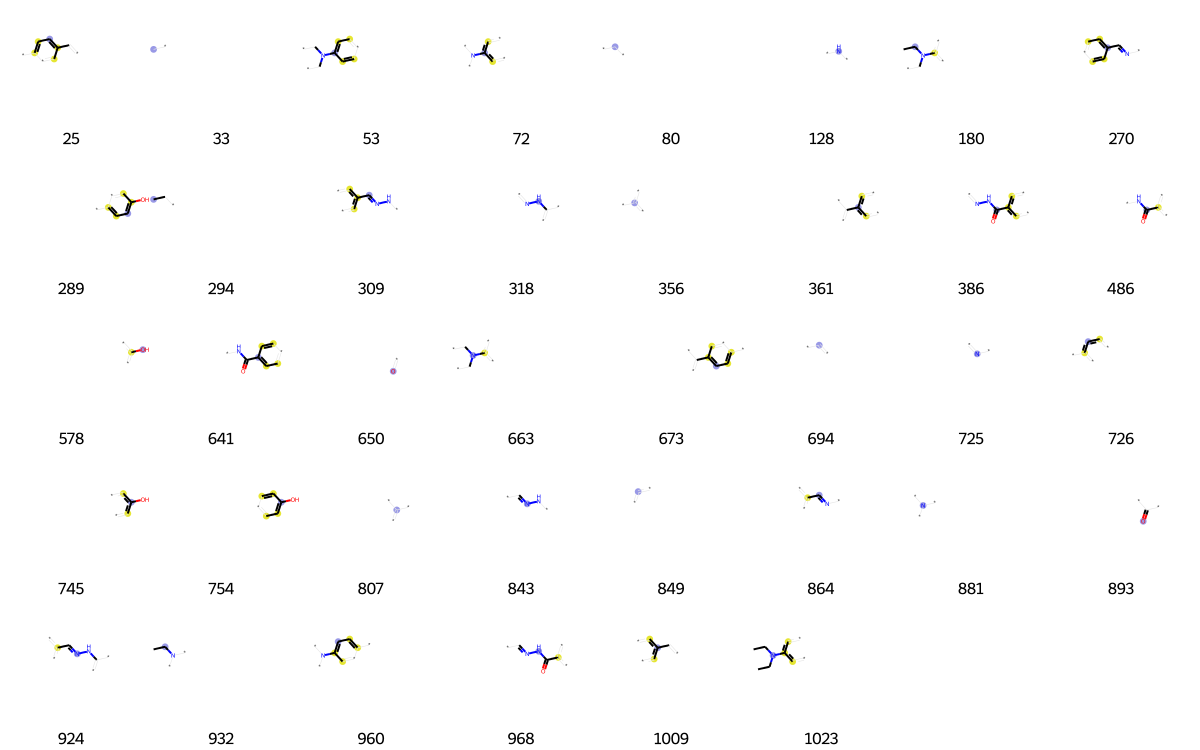

In [89]:
prints = [(M16, x, bi) for x in fp16.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp16.GetOnBits ()])

In [90]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

[3,
 10,
 13,
 14,
 15,
 22,
 33,
 42,
 64,
 66,
 80,
 92,
 107,
 113,
 114,
 133,
 136,
 155,
 180,
 217,
 322,
 350,
 356,
 366,
 367,
 389,
 428,
 433,
 441,
 452,
 477,
 481,
 587,
 628,
 650,
 654,
 656,
 692,
 695,
 698,
 713,
 718,
 722,
 723,
 726,
 730,
 736,
 745,
 751,
 807,
 849,
 863,
 875,
 881,
 887,
 893,
 899,
 925,
 926,
 997,
 1004,
 1010,
 1019]

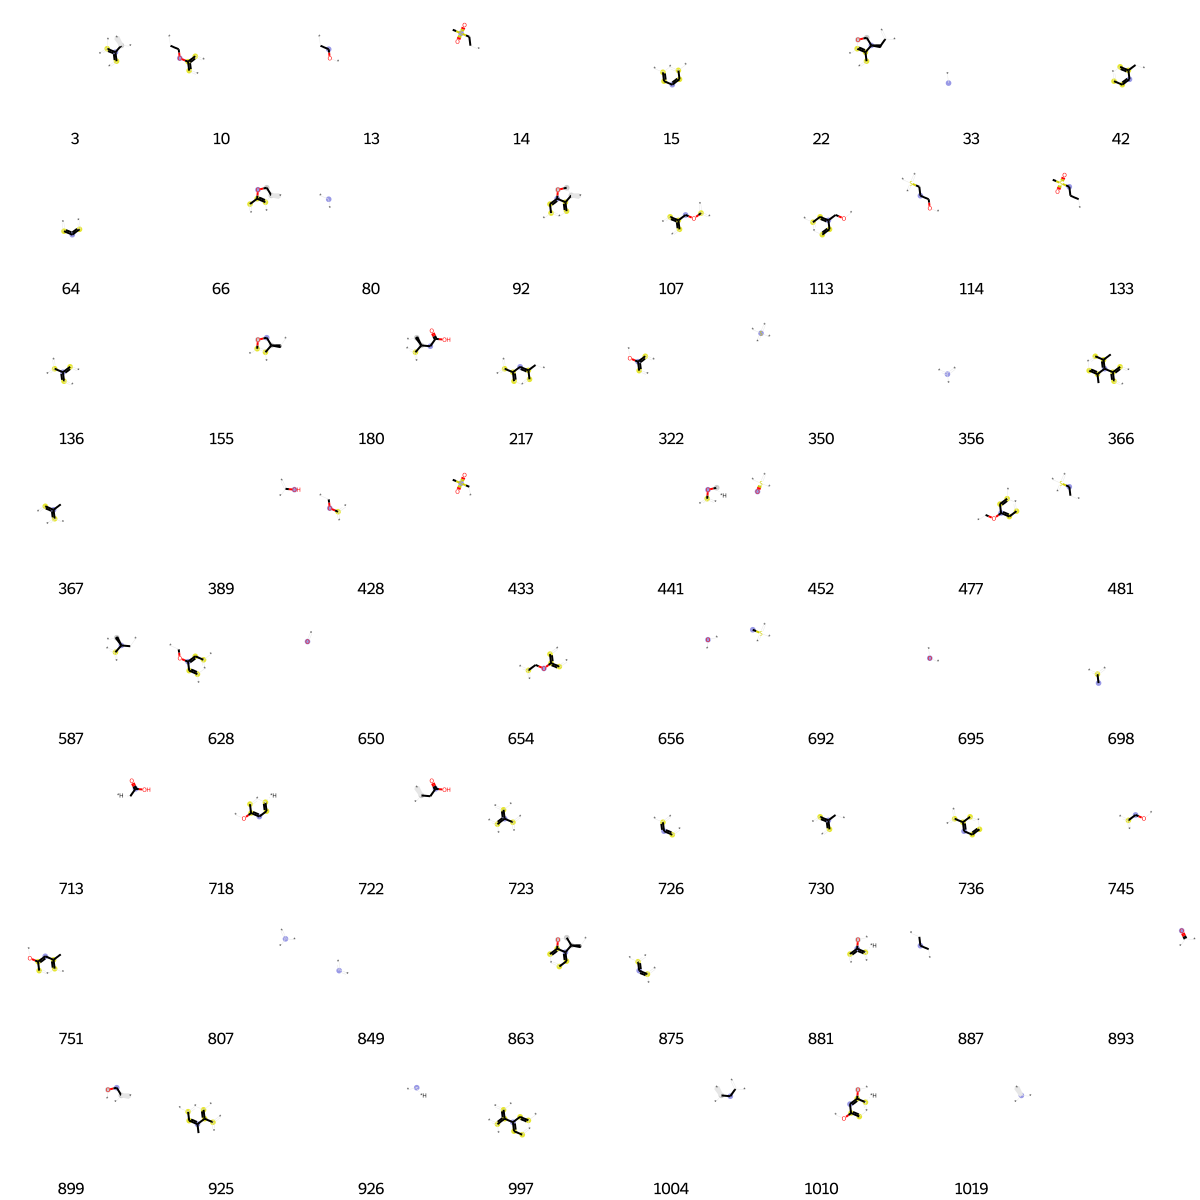

In [91]:
prints = [(M17, x, bi) for x in fp17.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp17.GetOnBits ()])

In [92]:
bi = {}

fp18= AllChem.GetMorganFingerprintAsBitVect(M18, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp18, fp_arr)
np.nonzero(fp_arr)
list(fp18.GetOnBits())

[33,
 44,
 121,
 128,
 144,
 157,
 167,
 171,
 193,
 207,
 212,
 240,
 248,
 250,
 299,
 301,
 322,
 339,
 356,
 378,
 387,
 420,
 433,
 438,
 456,
 457,
 486,
 518,
 578,
 583,
 593,
 610,
 631,
 650,
 656,
 667,
 675,
 695,
 715,
 718,
 723,
 726,
 729,
 745,
 753,
 769,
 785,
 790,
 807,
 838,
 849,
 855,
 875,
 893,
 926,
 935,
 939,
 946,
 993,
 1019]

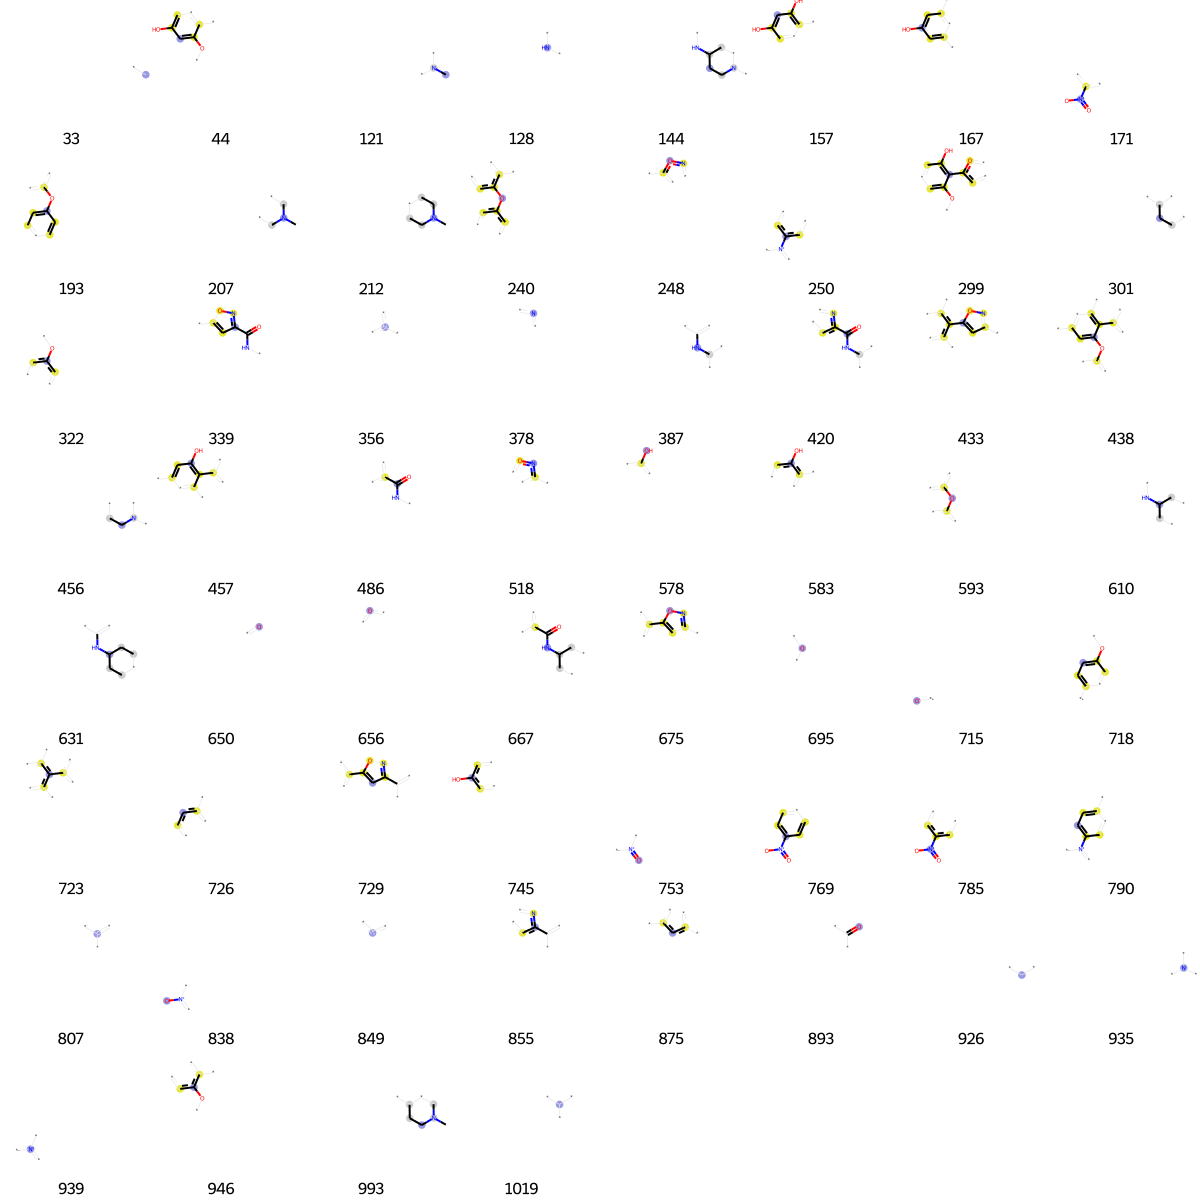

In [93]:
prints = [(M18, x, bi) for x in fp18.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp18.GetOnBits ()])

In [94]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[33, 88, 160, 202, 278, 356, 570, 578, 582, 661, 807, 849, 875, 947]

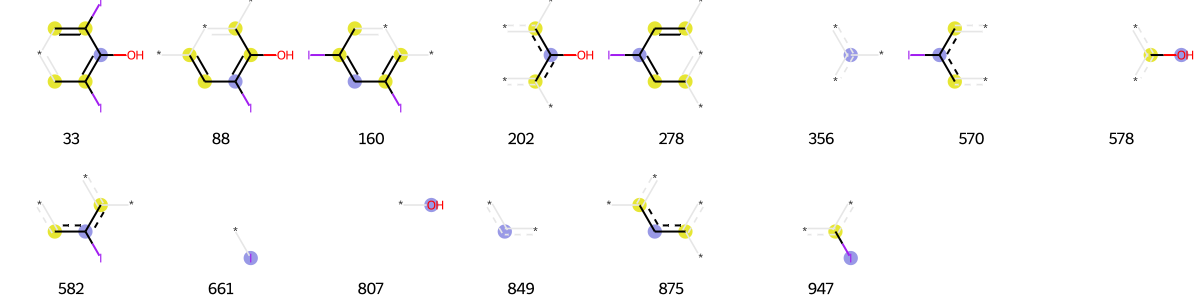

In [95]:
prints = [(M19, x, bi) for x in fp19.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp19.GetOnBits ()])

In [96]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[14,
 15,
 29,
 33,
 36,
 56,
 64,
 72,
 74,
 90,
 96,
 107,
 121,
 135,
 139,
 142,
 165,
 207,
 212,
 216,
 252,
 281,
 288,
 314,
 319,
 350,
 352,
 356,
 357,
 388,
 452,
 456,
 480,
 527,
 559,
 561,
 565,
 586,
 590,
 592,
 624,
 633,
 650,
 659,
 665,
 692,
 694,
 698,
 715,
 721,
 726,
 753,
 755,
 785,
 807,
 815,
 833,
 840,
 849,
 875,
 881,
 893,
 926,
 935,
 942,
 958,
 966,
 985,
 1004]

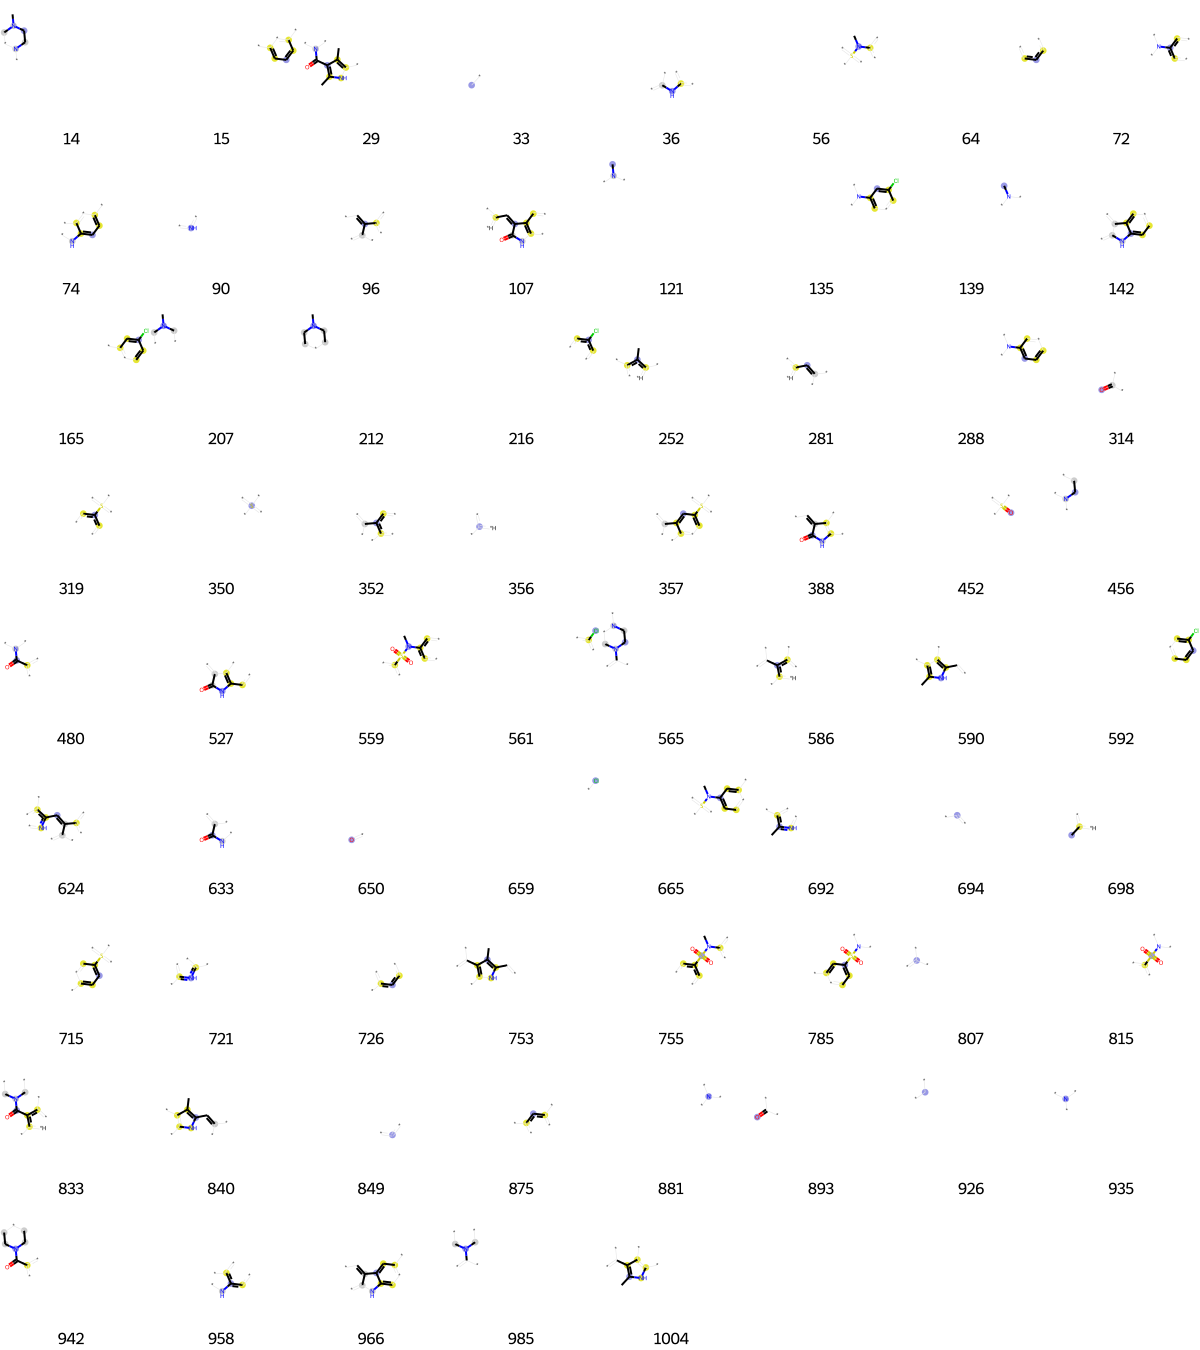

In [97]:
prints = [(M20, x, bi) for x in fp20.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp20.GetOnBits ()])

In [98]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

[4,
 21,
 33,
 36,
 39,
 45,
 65,
 119,
 121,
 128,
 200,
 207,
 212,
 244,
 249,
 301,
 314,
 322,
 356,
 378,
 428,
 441,
 456,
 458,
 463,
 491,
 511,
 512,
 524,
 544,
 555,
 558,
 564,
 595,
 635,
 641,
 650,
 672,
 695,
 718,
 726,
 771,
 831,
 832,
 841,
 849,
 875,
 886,
 888,
 890,
 910,
 926,
 935,
 946,
 959,
 969,
 993,
 1019,
 1022]

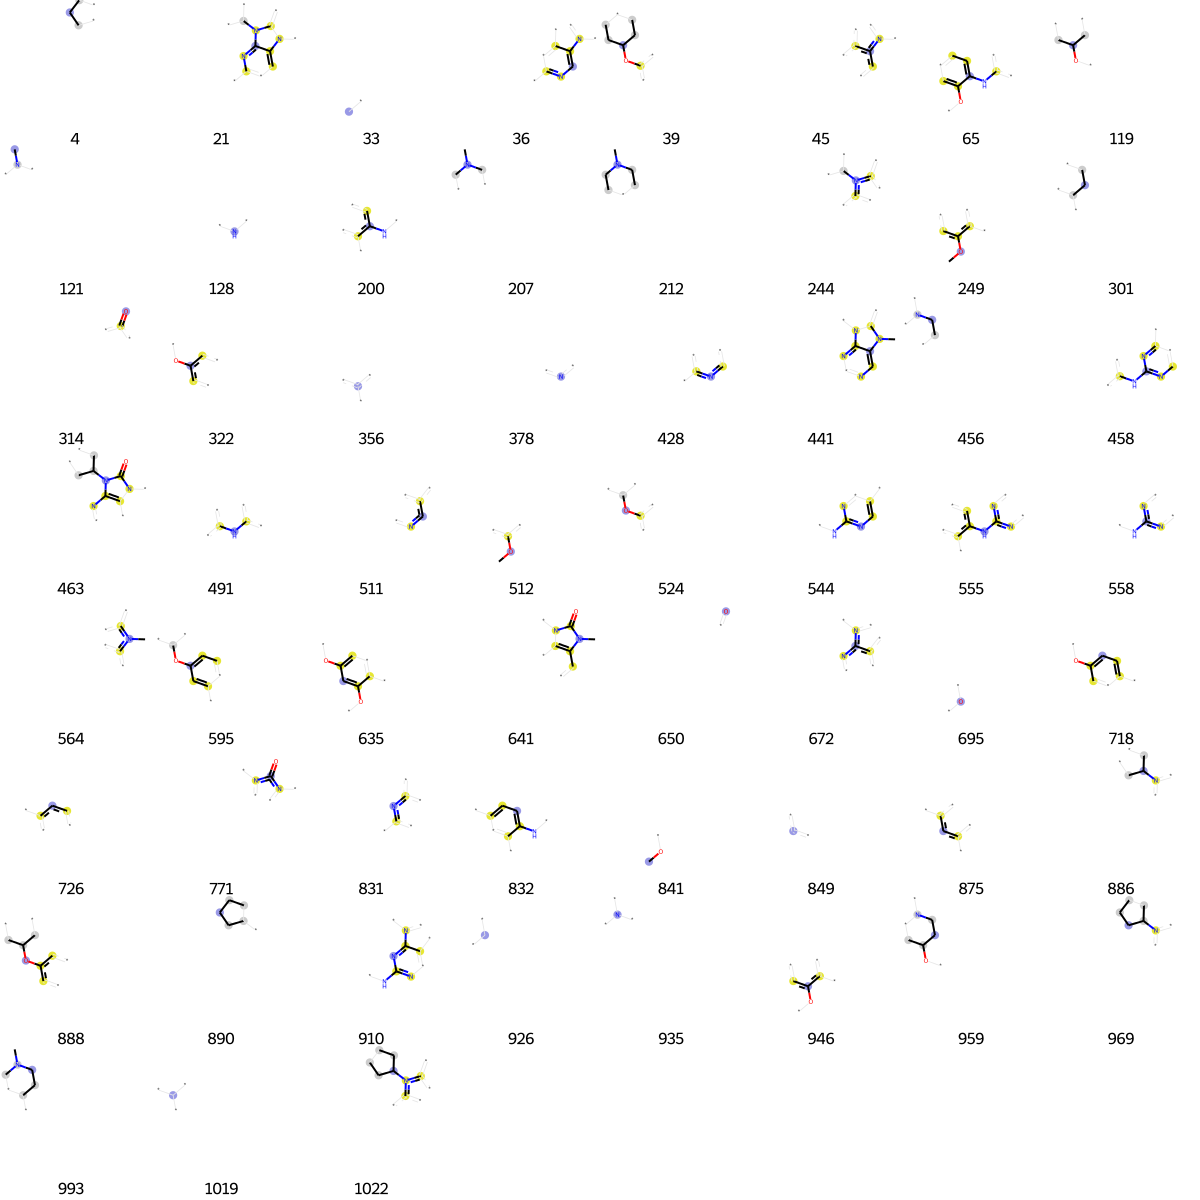

In [99]:
prints = [(M21, x, bi) for x in fp21.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp21.GetOnBits ()])

In [100]:
bi = {}

fp22= AllChem.GetMorganFingerprintAsBitVect(M22, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp22, fp_arr)
np.nonzero(fp_arr)
list(fp22.GetOnBits())

[42,
 64,
 73,
 80,
 128,
 175,
 255,
 289,
 333,
 342,
 356,
 378,
 389,
 392,
 467,
 548,
 549,
 558,
 638,
 708,
 715,
 726,
 730,
 831,
 849,
 933,
 937,
 980]

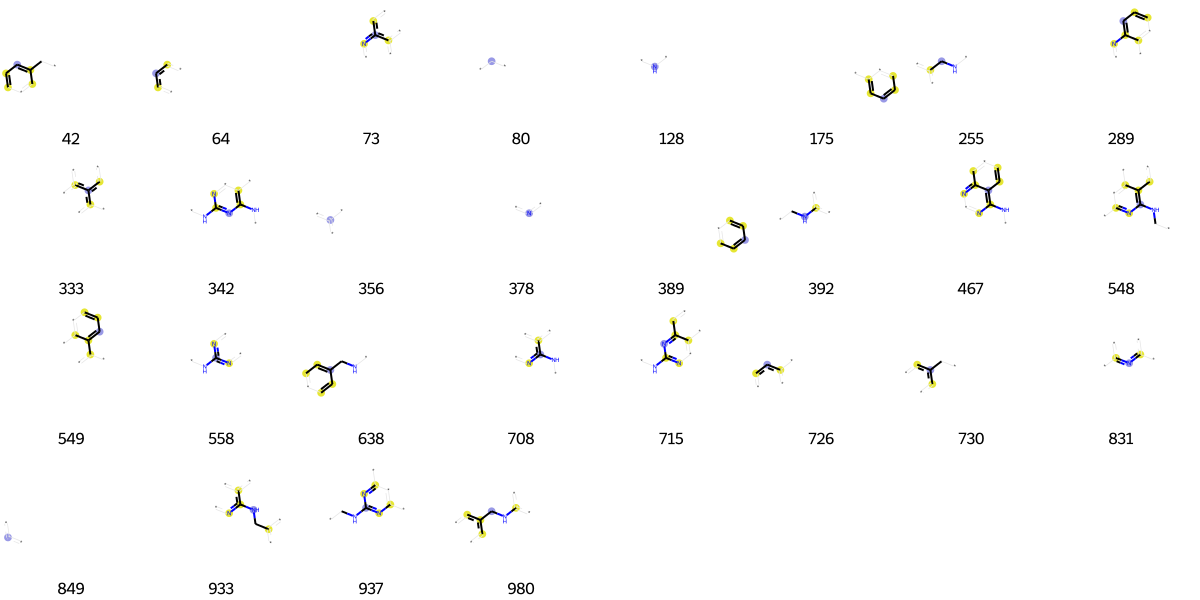

In [101]:
prints = [(M22, x, bi) for x in fp22.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp22.GetOnBits ()])

In [102]:
bi = {}

fp23= AllChem.GetMorganFingerprintAsBitVect(M23, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp23, fp_arr)
np.nonzero(fp_arr)
list(fp23.GetOnBits())

[1, 7, 33, 115, 147, 283, 389, 650, 727, 749, 786, 807, 820, 893, 1022]

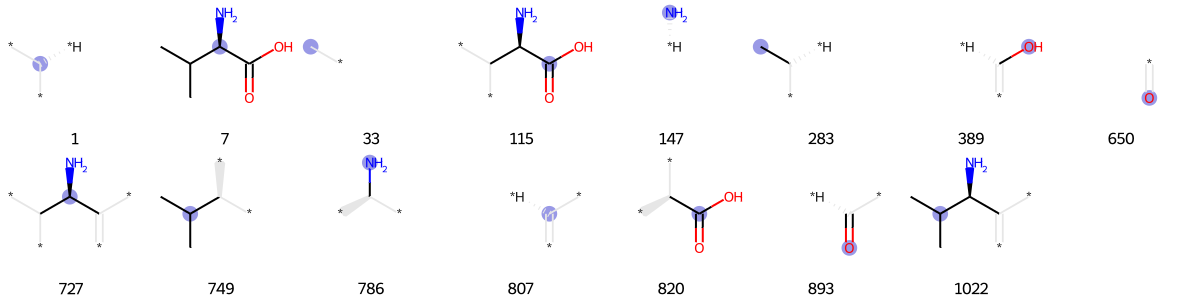

In [103]:
prints = [(M23, x, bi) for x in fp23.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp23.GetOnBits ()])

In [104]:
bi = {}

fp24= AllChem.GetMorganFingerprintAsBitVect(M24, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp24, fp_arr)
np.nonzero(fp_arr)
list(fp24.GetOnBits())

[0,
 20,
 33,
 36,
 42,
 51,
 54,
 64,
 67,
 68,
 80,
 83,
 90,
 96,
 102,
 104,
 119,
 121,
 128,
 130,
 138,
 140,
 147,
 157,
 174,
 175,
 197,
 200,
 214,
 215,
 233,
 249,
 251,
 261,
 270,
 271,
 275,
 288,
 289,
 294,
 309,
 327,
 333,
 343,
 350,
 356,
 361,
 376,
 413,
 420,
 422,
 442,
 452,
 456,
 512,
 545,
 547,
 549,
 588,
 592,
 602,
 638,
 650,
 674,
 679,
 687,
 695,
 701,
 710,
 714,
 721,
 726,
 739,
 759,
 787,
 807,
 830,
 833,
 839,
 841,
 849,
 873,
 875,
 878,
 882,
 893,
 924,
 926,
 928,
 930,
 932,
 935,
 938,
 946,
 956,
 978,
 991,
 1019]

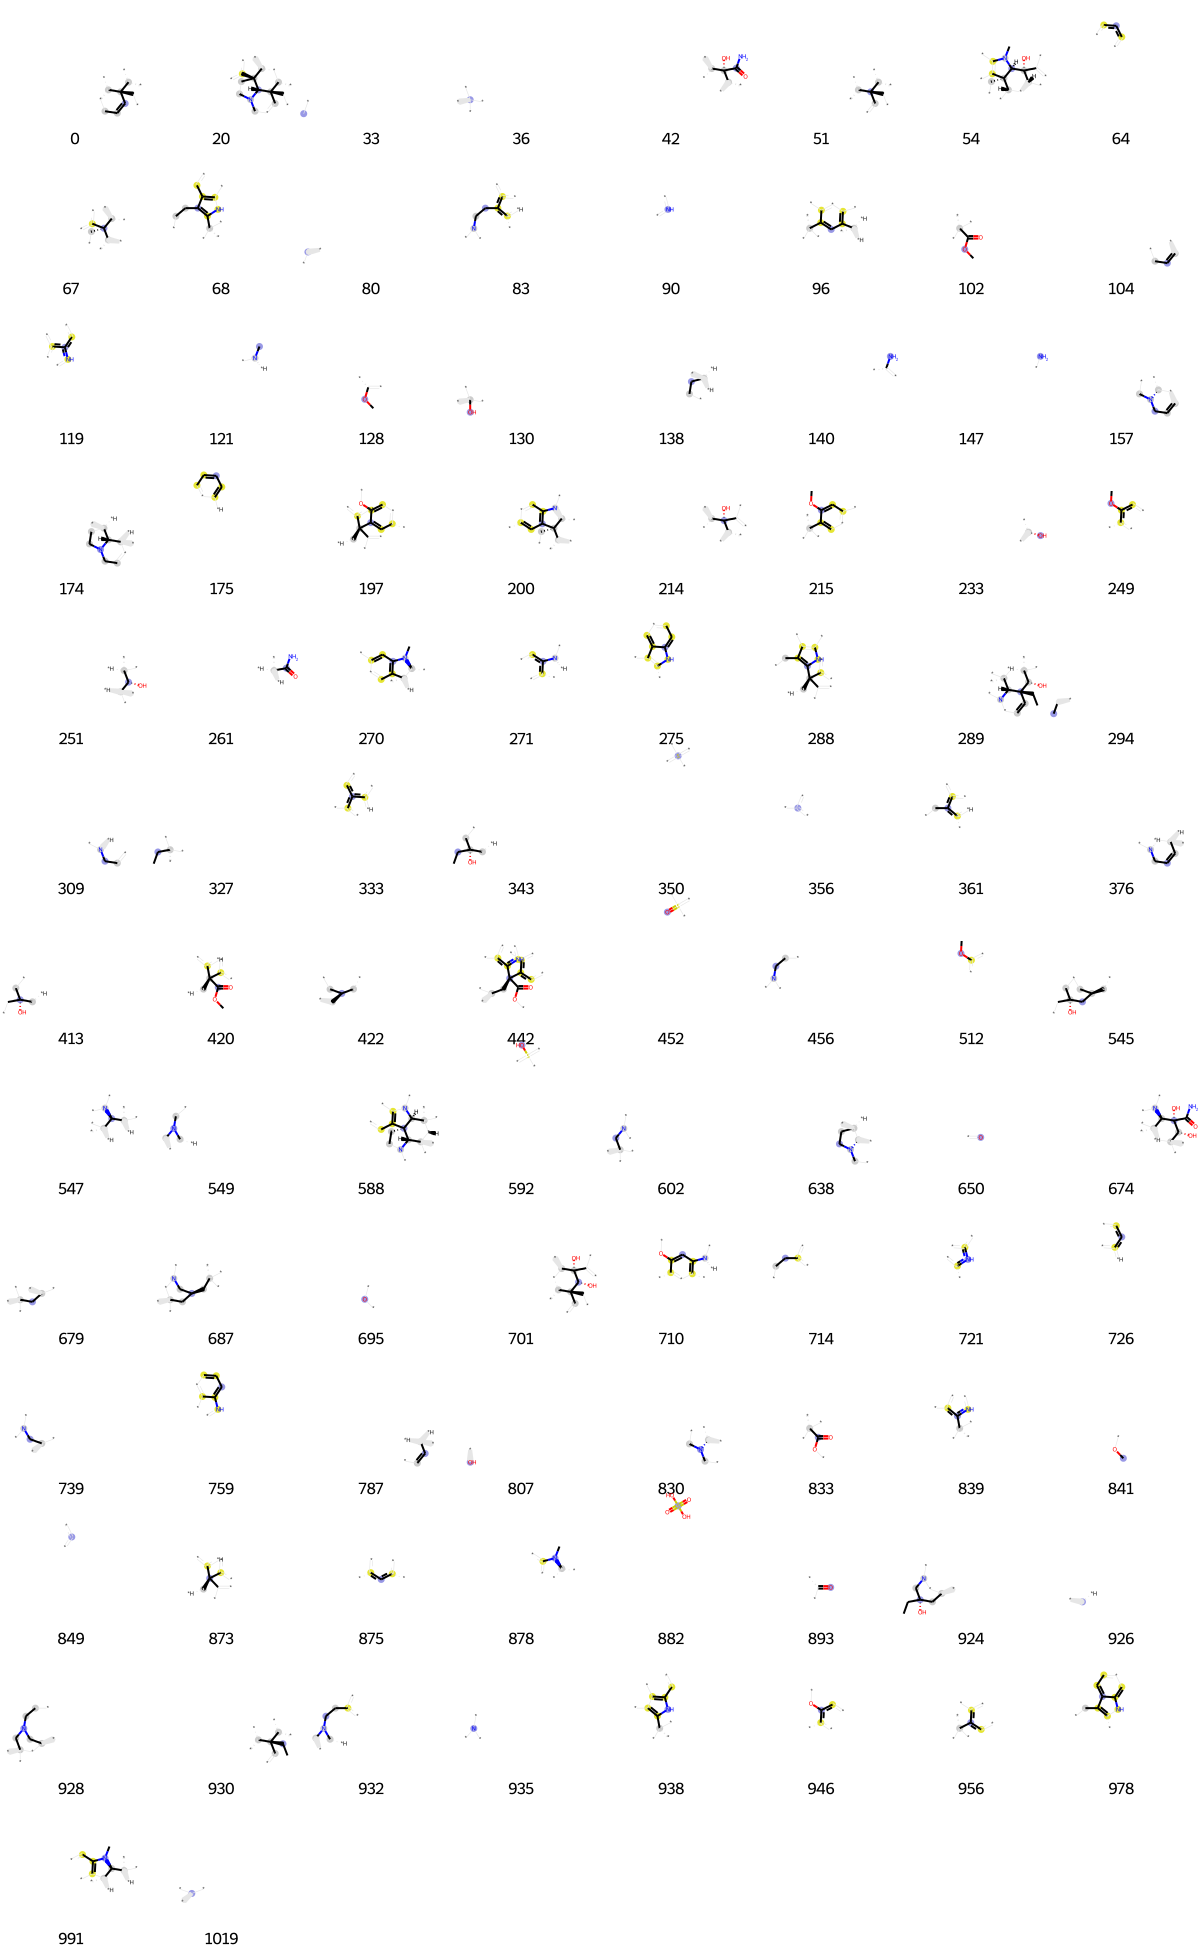

In [105]:
prints = [(M24, x, bi) for x in fp24.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp24.GetOnBits ()])

In [106]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[4,
 25,
 33,
 144,
 249,
 281,
 314,
 354,
 356,
 358,
 395,
 409,
 451,
 452,
 512,
 578,
 583,
 614,
 650,
 694,
 695,
 714,
 726,
 804,
 807,
 841,
 849,
 875,
 892,
 919,
 926,
 946,
 981,
 1009]

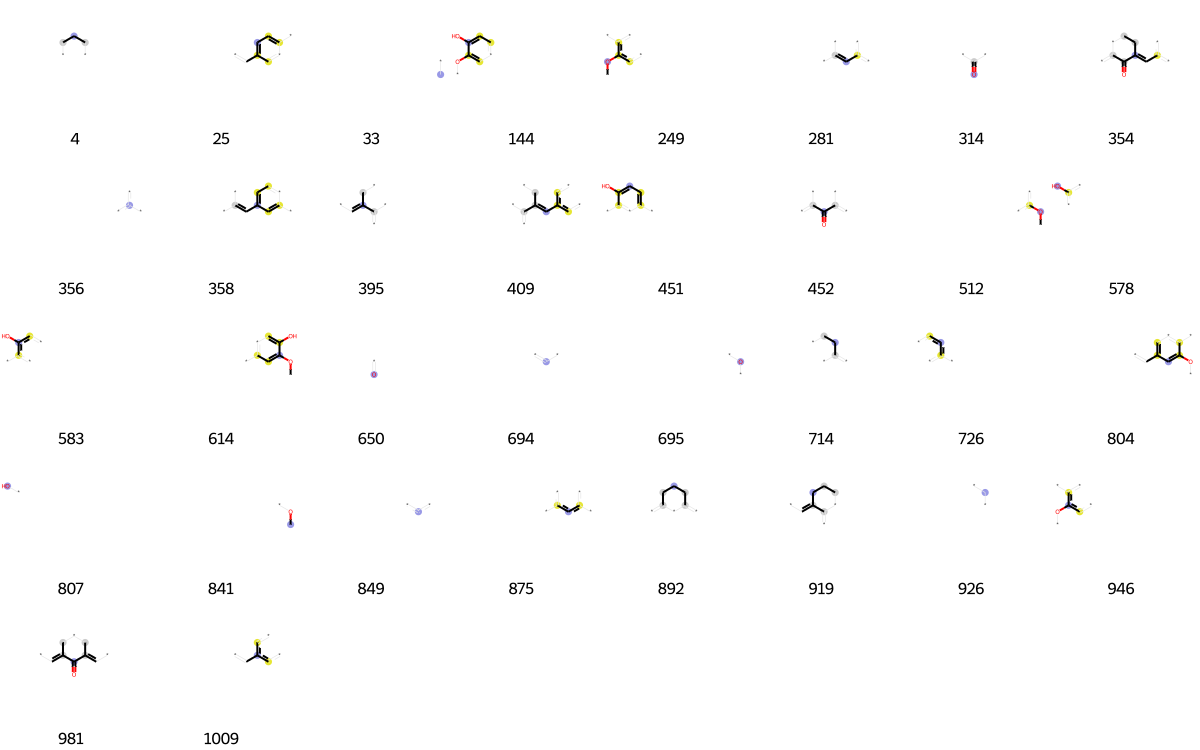

In [107]:
prints = [(M25, x, bi) for x in fp25.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp25.GetOnBits ()])

In [108]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[25,
 33,
 64,
 75,
 77,
 128,
 148,
 175,
 191,
 211,
 322,
 356,
 378,
 389,
 427,
 431,
 491,
 500,
 512,
 655,
 695,
 718,
 726,
 781,
 801,
 815,
 831,
 841,
 843,
 849,
 932,
 935,
 990,
 1021]

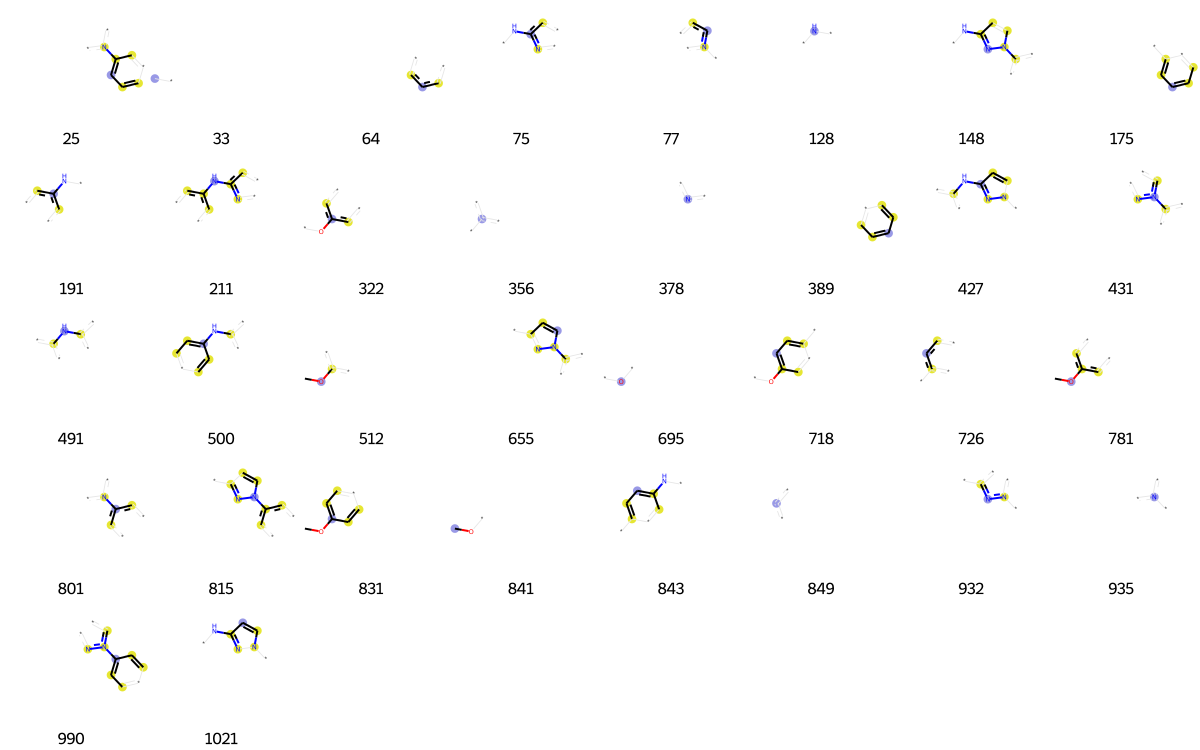

In [109]:
prints = [(M26, x, bi) for x in fp26.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp26.GetOnBits ()])

In [110]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[9,
 33,
 72,
 77,
 139,
 143,
 216,
 355,
 356,
 357,
 361,
 367,
 420,
 547,
 602,
 673,
 676,
 726,
 737,
 787,
 807,
 842,
 849,
 881,
 903,
 939,
 960,
 1016]

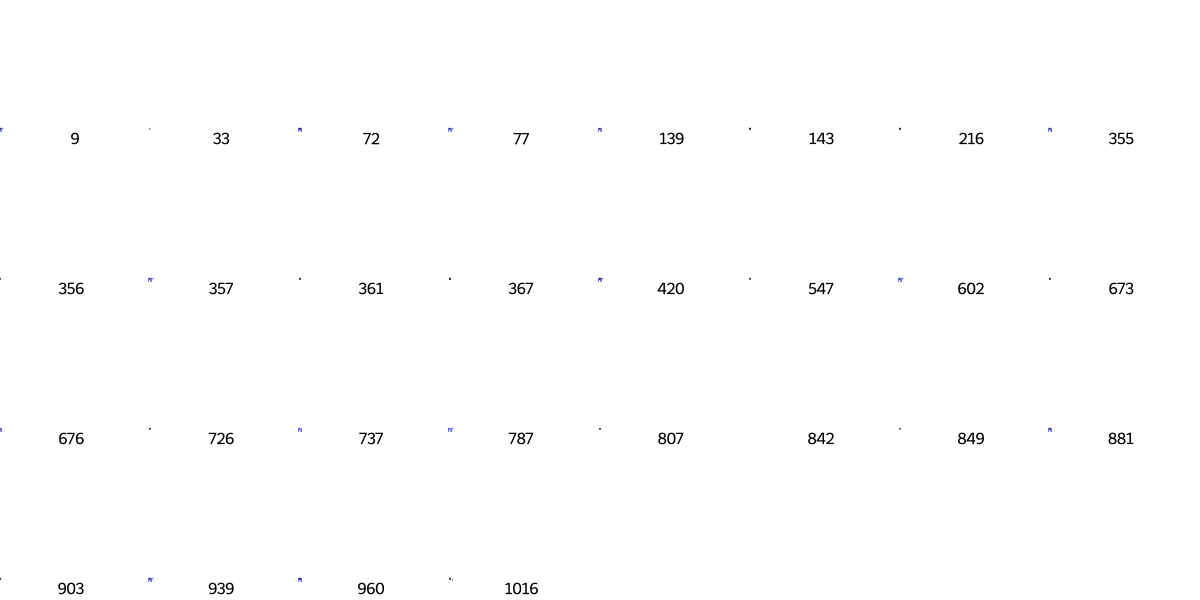

In [111]:
prints = [(M27, x, bi) for x in fp27.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp27.GetOnBits ()])

In [112]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[15,
 23,
 33,
 41,
 52,
 64,
 80,
 116,
 128,
 138,
 294,
 356,
 367,
 378,
 381,
 414,
 461,
 478,
 628,
 650,
 698,
 707,
 726,
 782,
 792,
 807,
 849,
 893,
 975,
 976]

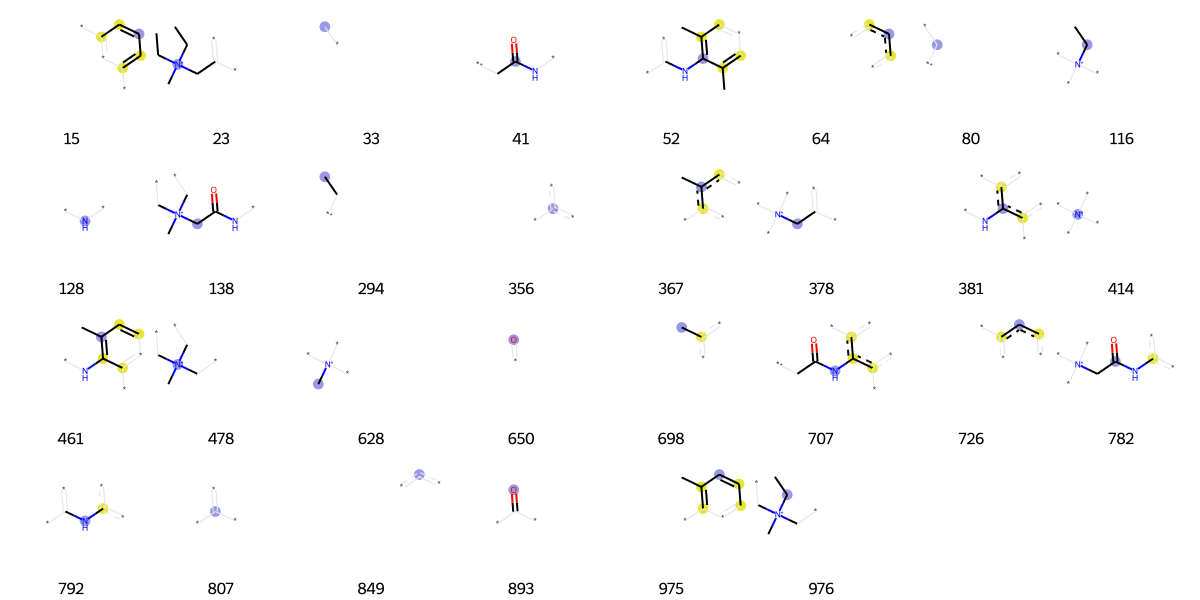

In [113]:
prints = [(M28, x, bi) for x in fp28.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp28.GetOnBits ()])

In [114]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[13,
 33,
 80,
 145,
 147,
 167,
 289,
 294,
 356,
 361,
 498,
 568,
 578,
 606,
 650,
 673,
 695,
 726,
 745,
 754,
 794,
 807,
 849,
 870,
 893]

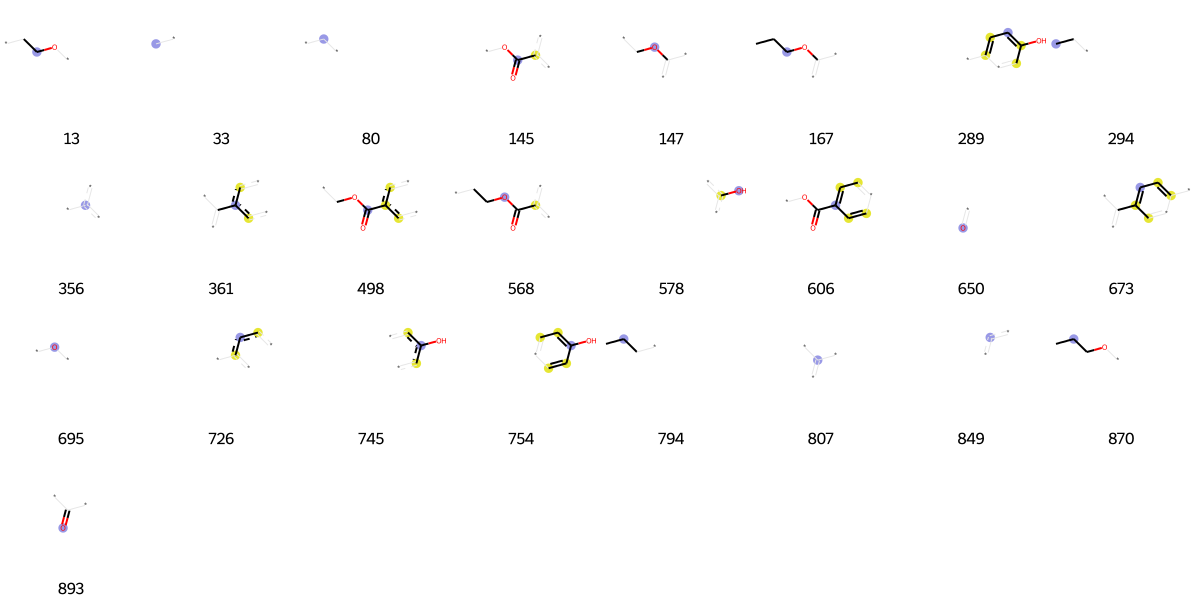

In [115]:
prints = [(M29, x, bi) for x in fp29.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp29.GetOnBits ()])

In [116]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[1,
 33,
 73,
 80,
 93,
 106,
 128,
 192,
 255,
 283,
 325,
 356,
 378,
 425,
 431,
 438,
 478,
 486,
 552,
 578,
 605,
 607,
 616,
 650,
 700,
 709,
 728,
 762,
 763,
 782,
 800,
 807,
 814,
 831,
 849,
 865,
 875,
 908,
 909,
 966]

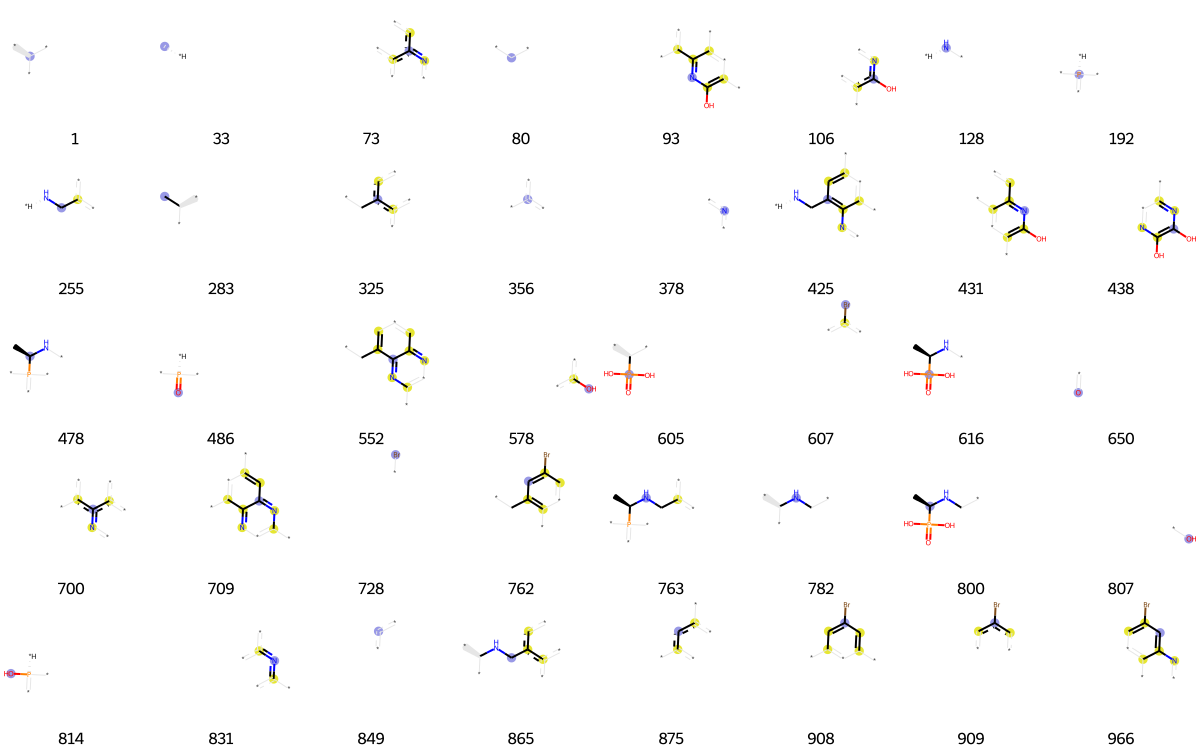

In [117]:
prints = [(M30, x, bi) for x in fp30.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp30.GetOnBits ()])

In [118]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[15,
 19,
 25,
 33,
 38,
 61,
 64,
 92,
 128,
 136,
 191,
 213,
 233,
 238,
 264,
 335,
 351,
 356,
 361,
 378,
 381,
 399,
 407,
 417,
 428,
 431,
 456,
 458,
 463,
 491,
 496,
 500,
 511,
 523,
 558,
 562,
 656,
 687,
 689,
 698,
 707,
 726,
 736,
 787,
 795,
 801,
 806,
 831,
 833,
 842,
 843,
 849,
 875,
 896,
 926,
 932,
 935,
 950,
 980,
 990,
 1012,
 1014]

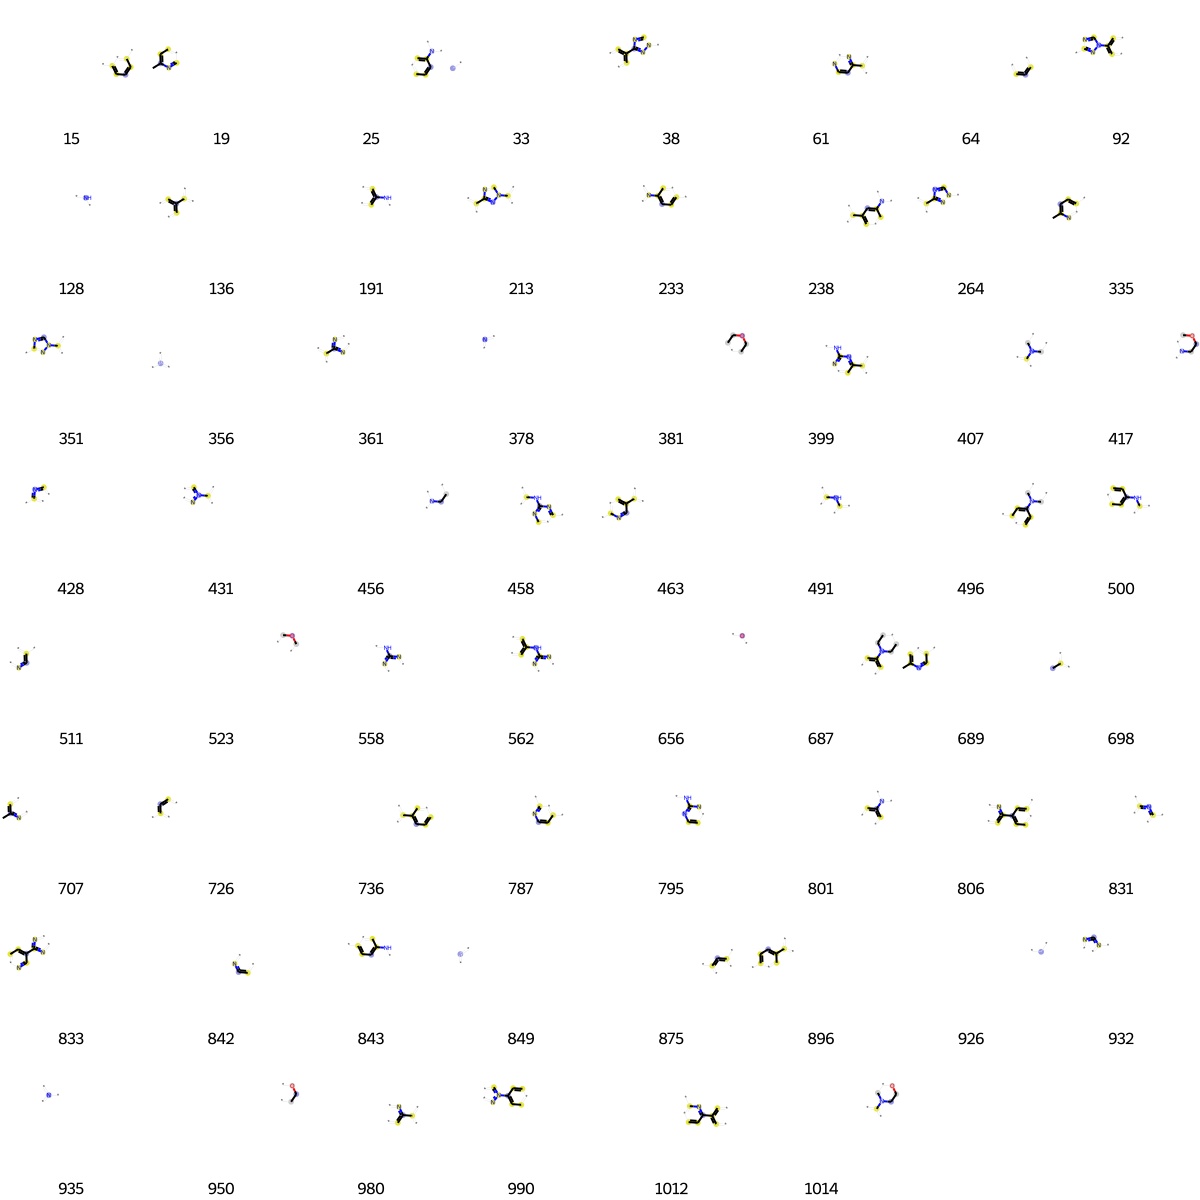

In [119]:
prints = [(M31, x, bi) for x in fp31.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp31.GetOnBits ()])

In [163]:
bi = {}

fp32= AllChem.GetMorganFingerprintAsBitVect(M32, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp32, fp_arr)
np.nonzero(fp_arr)
list(fp32.GetOnBits())

[14,
 15,
 33,
 36,
 40,
 76,
 81,
 121,
 128,
 134,
 173,
 191,
 207,
 210,
 212,
 233,
 250,
 289,
 317,
 323,
 345,
 356,
 378,
 381,
 406,
 407,
 428,
 456,
 458,
 484,
 486,
 490,
 491,
 499,
 500,
 511,
 544,
 558,
 562,
 611,
 650,
 687,
 726,
 801,
 807,
 831,
 843,
 849,
 879,
 893,
 926,
 930,
 932,
 935,
 940,
 953,
 968]

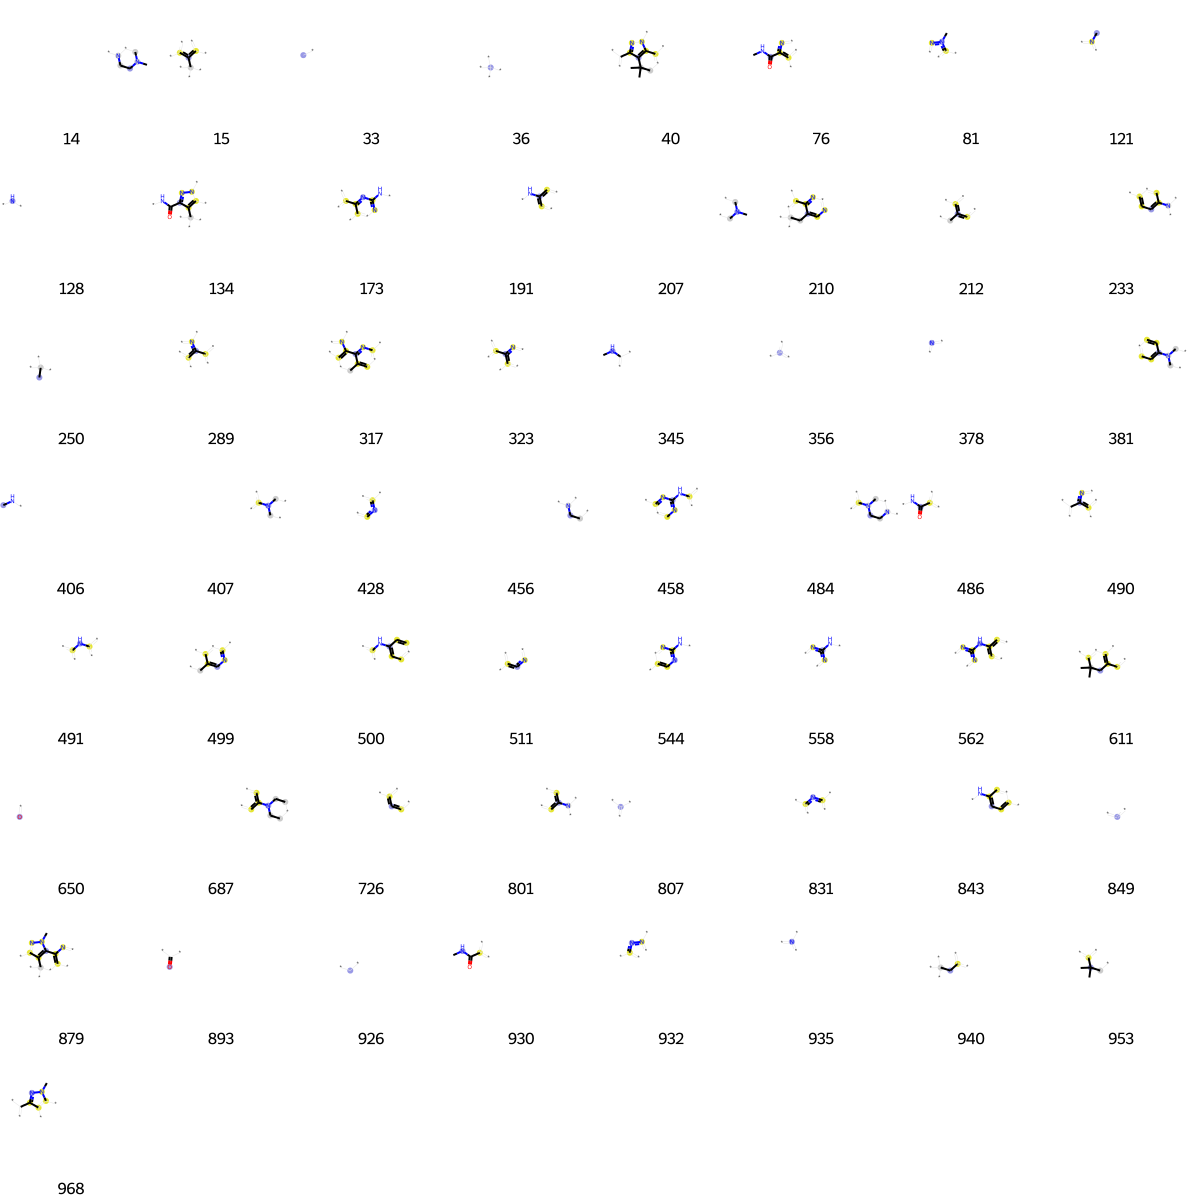

In [164]:
prints = [(M32, x, bi) for x in fp32.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp32.GetOnBits ()])

In [121]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[4,
 15,
 23,
 33,
 37,
 39,
 41,
 61,
 64,
 80,
 107,
 114,
 128,
 158,
 184,
 191,
 222,
 294,
 295,
 301,
 329,
 351,
 356,
 378,
 389,
 535,
 543,
 552,
 560,
 584,
 625,
 650,
 664,
 675,
 694,
 703,
 726,
 727,
 792,
 799,
 800,
 807,
 819,
 831,
 835,
 849,
 875,
 893,
 901,
 914,
 919,
 926,
 953,
 976,
 980,
 1009,
 1017,
 1019]

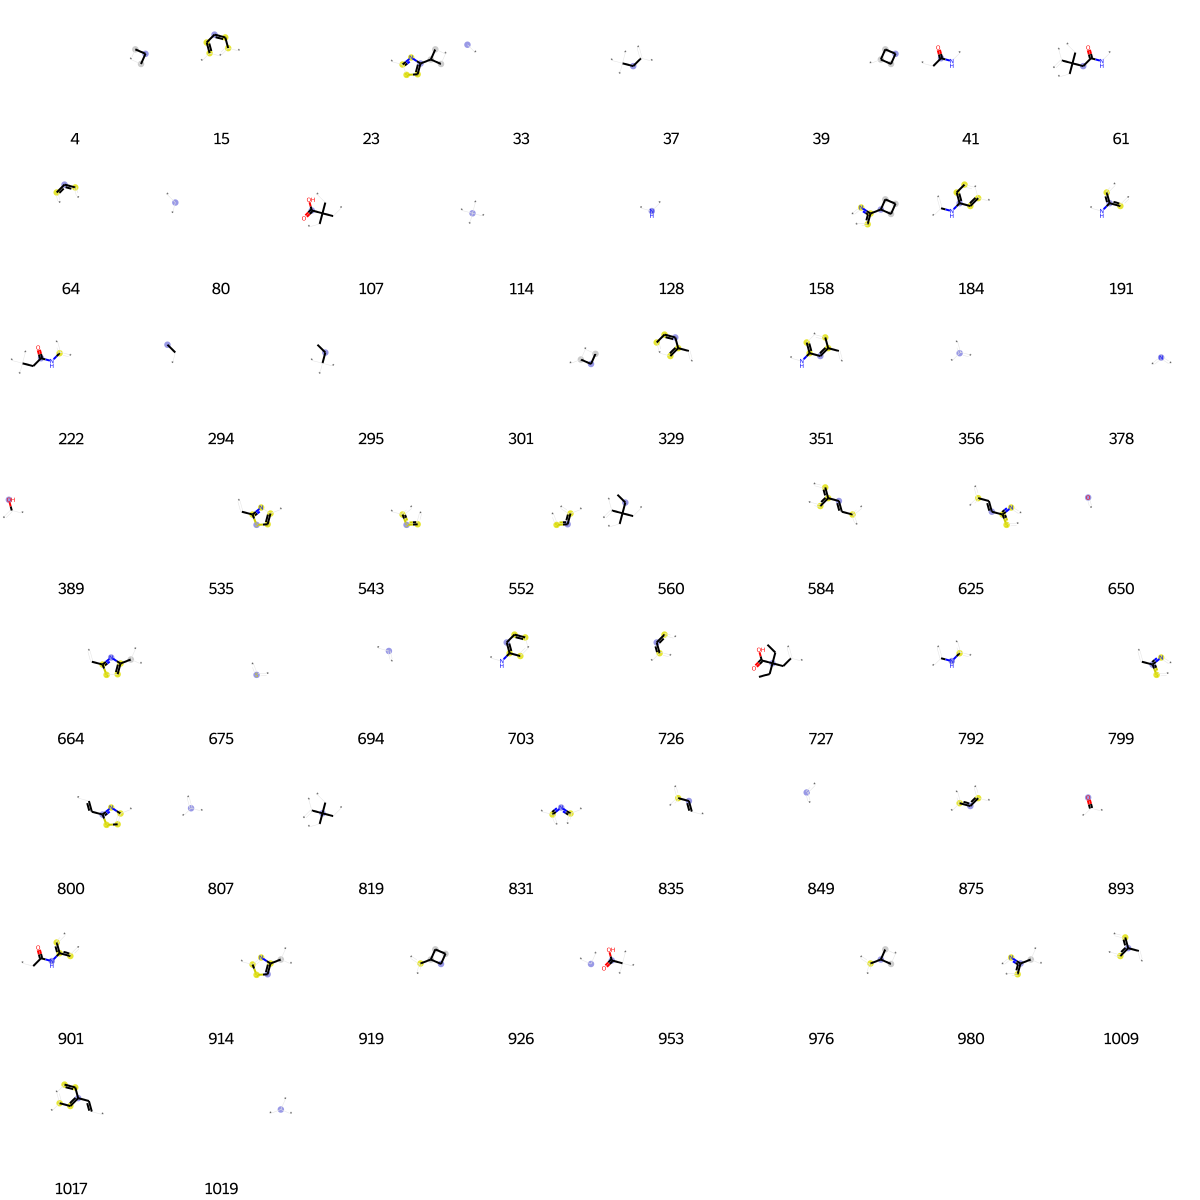

In [122]:
prints = [(M33, x, bi) for x in fp33.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp33.GetOnBits ()])

In [123]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[4,
 33,
 35,
 36,
 64,
 80,
 117,
 138,
 149,
 164,
 192,
 250,
 285,
 301,
 314,
 342,
 356,
 363,
 394,
 426,
 472,
 562,
 570,
 624,
 650,
 656,
 679,
 731,
 750,
 781,
 795,
 844,
 849,
 895,
 918,
 926,
 927,
 1019]

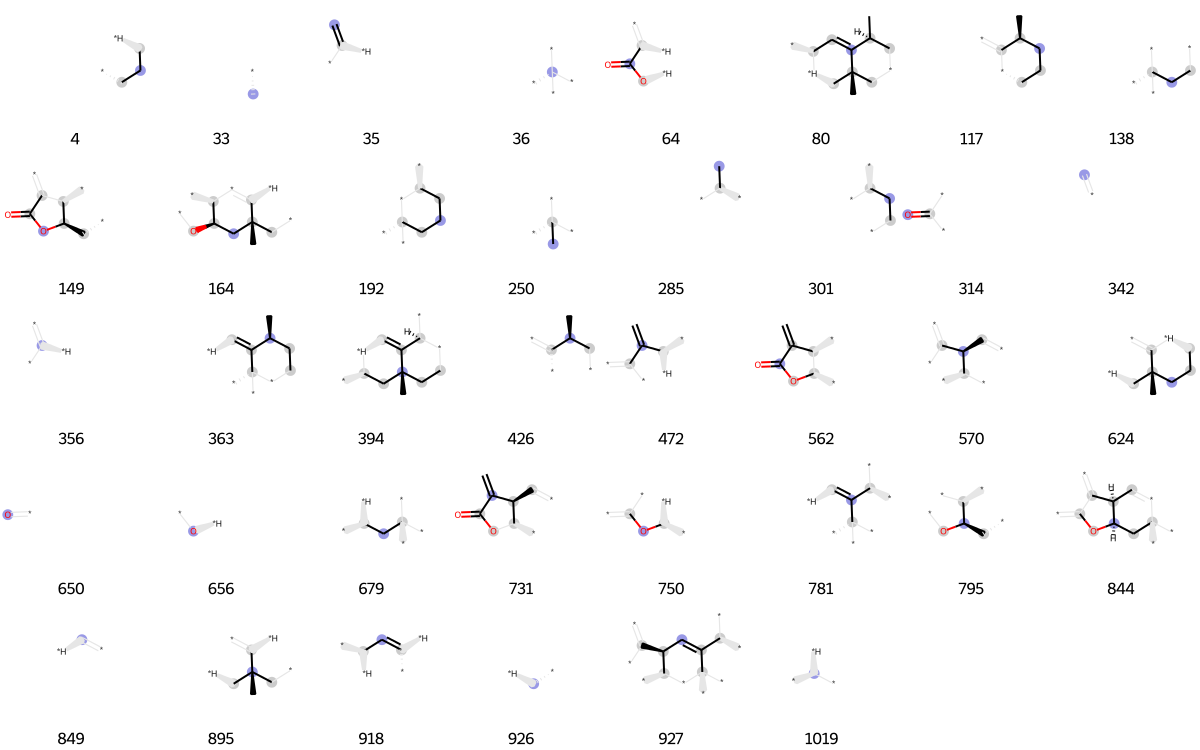

In [124]:
prints = [(M34, x, bi) for x in fp34.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp34.GetOnBits ()])

In [125]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[33,
 58,
 64,
 67,
 80,
 94,
 175,
 220,
 232,
 249,
 263,
 299,
 333,
 356,
 389,
 512,
 540,
 549,
 598,
 613,
 650,
 669,
 670,
 695,
 713,
 726,
 807,
 841,
 849,
 893,
 946,
 967]

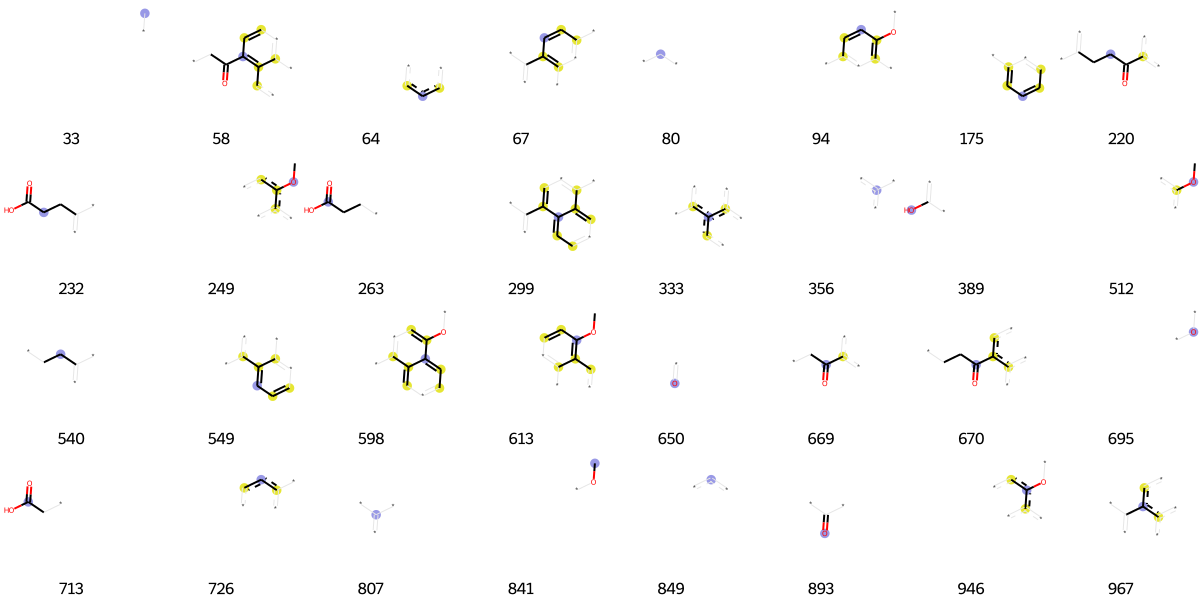

In [126]:
prints = [(M35, x, bi) for x in fp35.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp35.GetOnBits ()])

In [129]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[41, 80, 119, 128, 238, 243, 540, 607, 650, 694, 807, 878, 887, 893, 955]

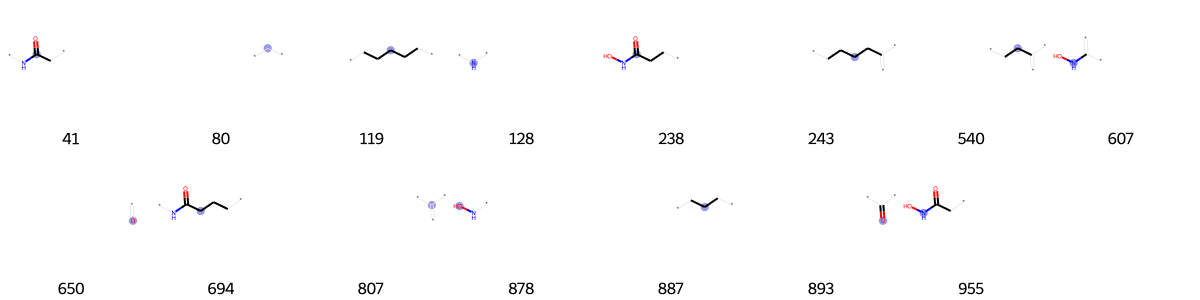

In [130]:
prints = [(M36, x, bi) for x in fp36.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp36.GetOnBits ()])

In [131]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[26,
 57,
 67,
 77,
 80,
 123,
 165,
 185,
 216,
 288,
 325,
 349,
 356,
 366,
 378,
 427,
 431,
 439,
 494,
 561,
 578,
 579,
 608,
 630,
 650,
 657,
 659,
 695,
 715,
 717,
 725,
 726,
 745,
 751,
 753,
 791,
 807,
 816,
 833,
 838,
 842,
 843,
 849,
 875,
 932,
 935,
 939,
 965,
 967,
 982]

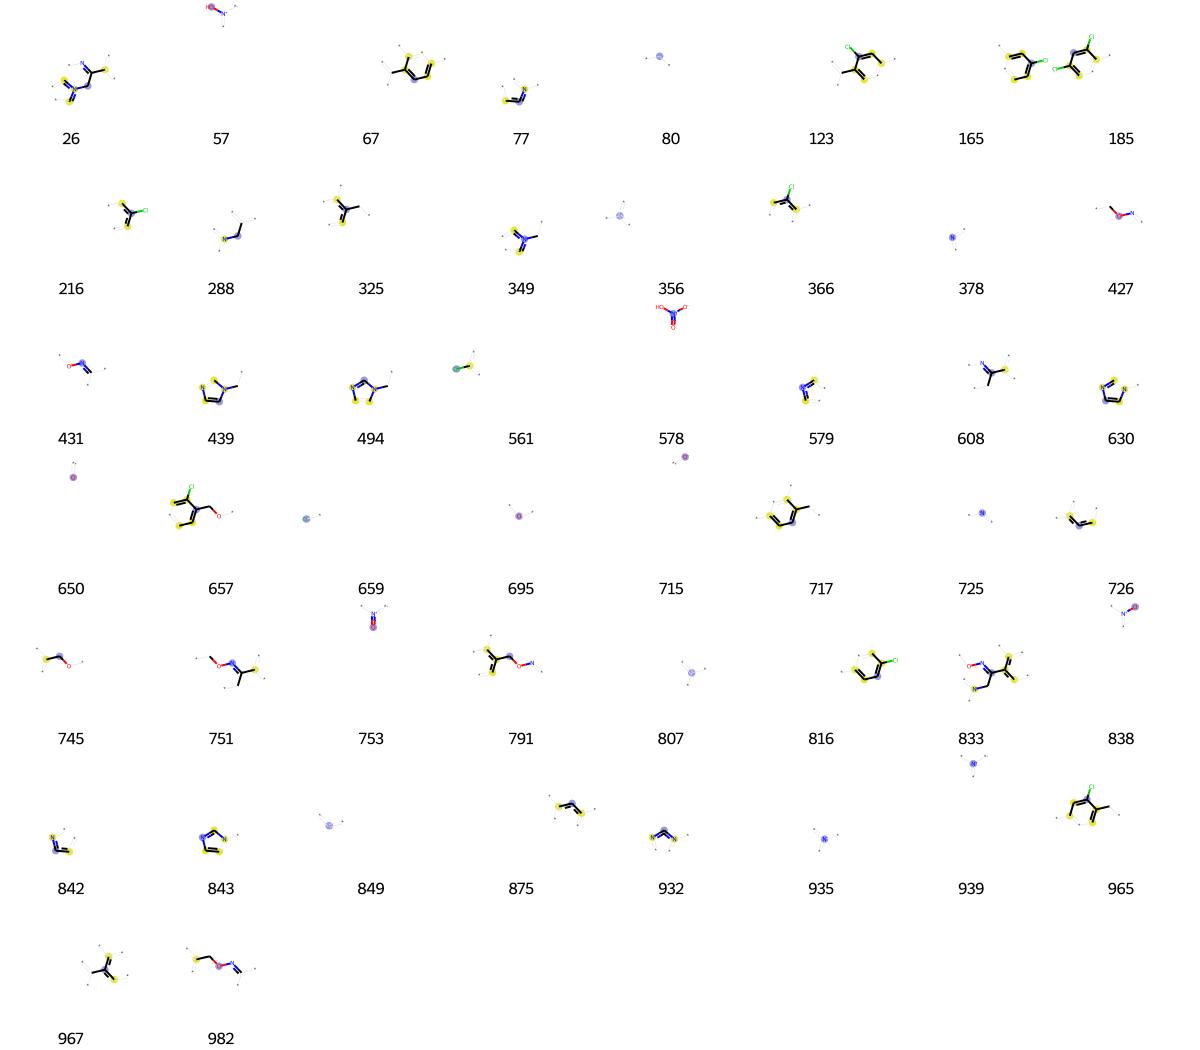

In [132]:
prints = [(M37, x, bi) for x in fp37.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp37.GetOnBits ()])

In [133]:
bi = {}

fp38= AllChem.GetMorganFingerprintAsBitVect(M38, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp38, fp_arr)
np.nonzero(fp_arr)
list(fp38.GetOnBits())

[33,
 80,
 82,
 114,
 175,
 294,
 295,
 478,
 487,
 616,
 650,
 692,
 695,
 715,
 753,
 807,
 838,
 905,
 931,
 939]

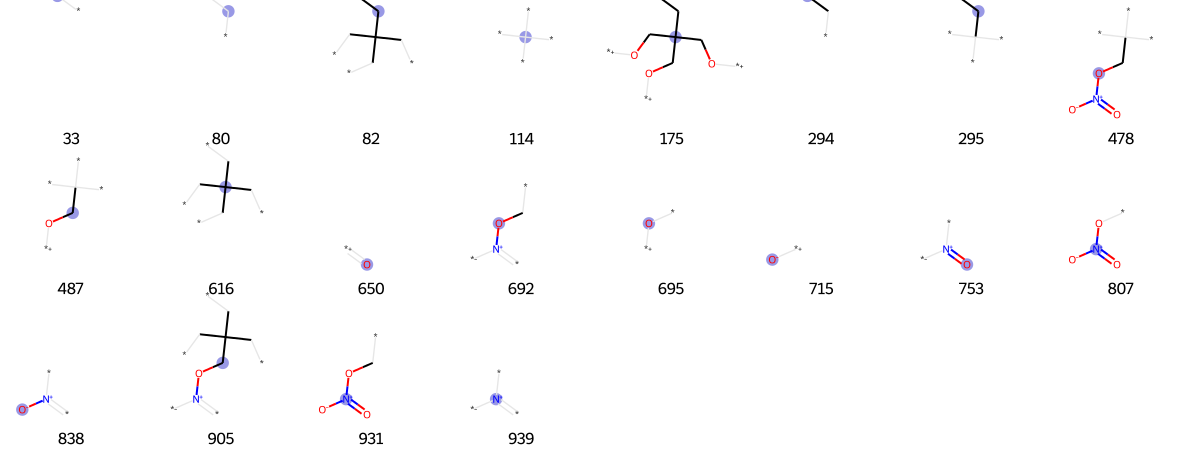

In [134]:
prints = [(M38, x, bi) for x in fp38.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp38.GetOnBits ()])

In [135]:
bi = {}

fp39= AllChem.GetMorganFingerprintAsBitVect(M39, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp39, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[1,
 33,
 80,
 92,
 94,
 111,
 112,
 118,
 136,
 162,
 186,
 194,
 254,
 266,
 283,
 325,
 329,
 356,
 360,
 361,
 375,
 378,
 389,
 400,
 406,
 428,
 456,
 539,
 650,
 674,
 675,
 695,
 698,
 726,
 770,
 781,
 790,
 807,
 823,
 831,
 838,
 849,
 875,
 893,
 896,
 910,
 925,
 946]

In [137]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[31,
 64,
 87,
 157,
 164,
 167,
 202,
 233,
 255,
 276,
 277,
 314,
 356,
 416,
 457,
 513,
 578,
 583,
 585,
 648,
 650,
 656,
 723,
 729,
 739,
 745,
 750,
 807,
 816,
 849,
 875,
 881,
 970,
 1019]

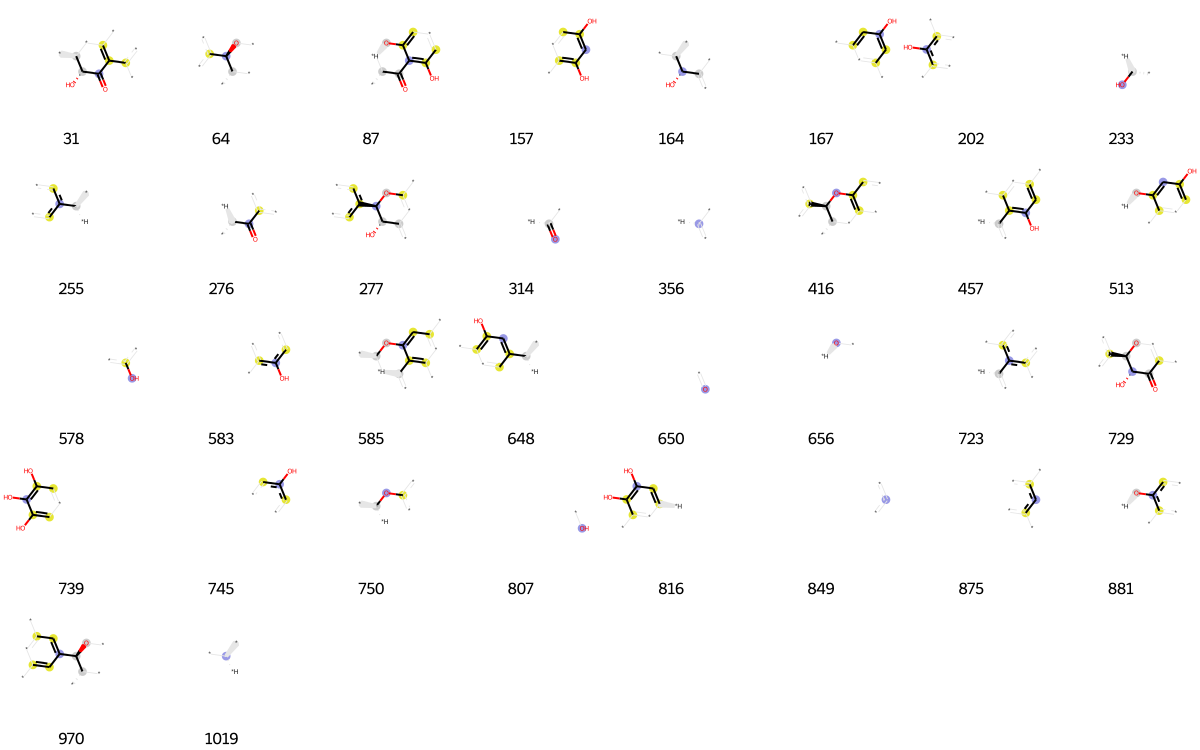

In [138]:
prints = [(M40, x, bi) for x in fp40.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp40.GetOnBits ()])

In [139]:
bi = {}

fp41= AllChem.GetMorganFingerprintAsBitVect(M41, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp41, fp_arr)
np.nonzero(fp_arr)
list(fp41.GetOnBits())

[19,
 64,
 66,
 97,
 110,
 128,
 140,
 147,
 248,
 318,
 356,
 378,
 428,
 433,
 448,
 466,
 494,
 499,
 694,
 725,
 726,
 807,
 842,
 843,
 849,
 853,
 864,
 910,
 924,
 938,
 941,
 943]

In [161]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

[33,
 80,
 121,
 145,
 147,
 159,
 214,
 225,
 245,
 262,
 294,
 333,
 356,
 360,
 361,
 366,
 383,
 416,
 438,
 453,
 560,
 561,
 564,
 586,
 650,
 659,
 666,
 674,
 680,
 694,
 695,
 698,
 709,
 726,
 739,
 759,
 790,
 803,
 807,
 849,
 861,
 893,
 935,
 980,
 1005,
 1011,
 1015]

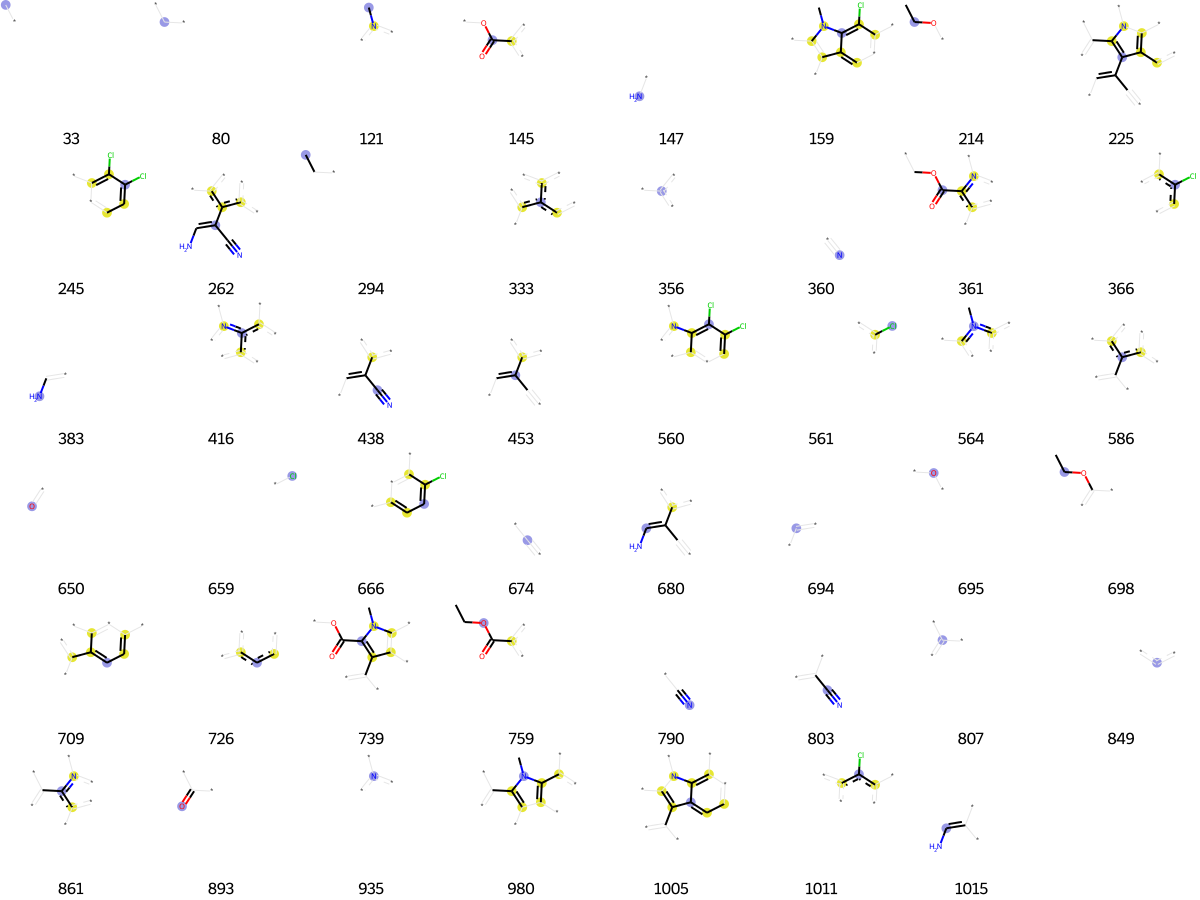

In [162]:
prints = [(M42, x, bi) for x in fp42.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp42.GetOnBits ()])

In [142]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

[10,
 13,
 31,
 80,
 90,
 102,
 121,
 219,
 301,
 314,
 322,
 356,
 360,
 361,
 378,
 389,
 428,
 508,
 517,
 575,
 619,
 625,
 650,
 670,
 673,
 694,
 695,
 713,
 718,
 724,
 726,
 734,
 755,
 774,
 807,
 849,
 855,
 860,
 887,
 893,
 898,
 926,
 931,
 974,
 976,
 1019]

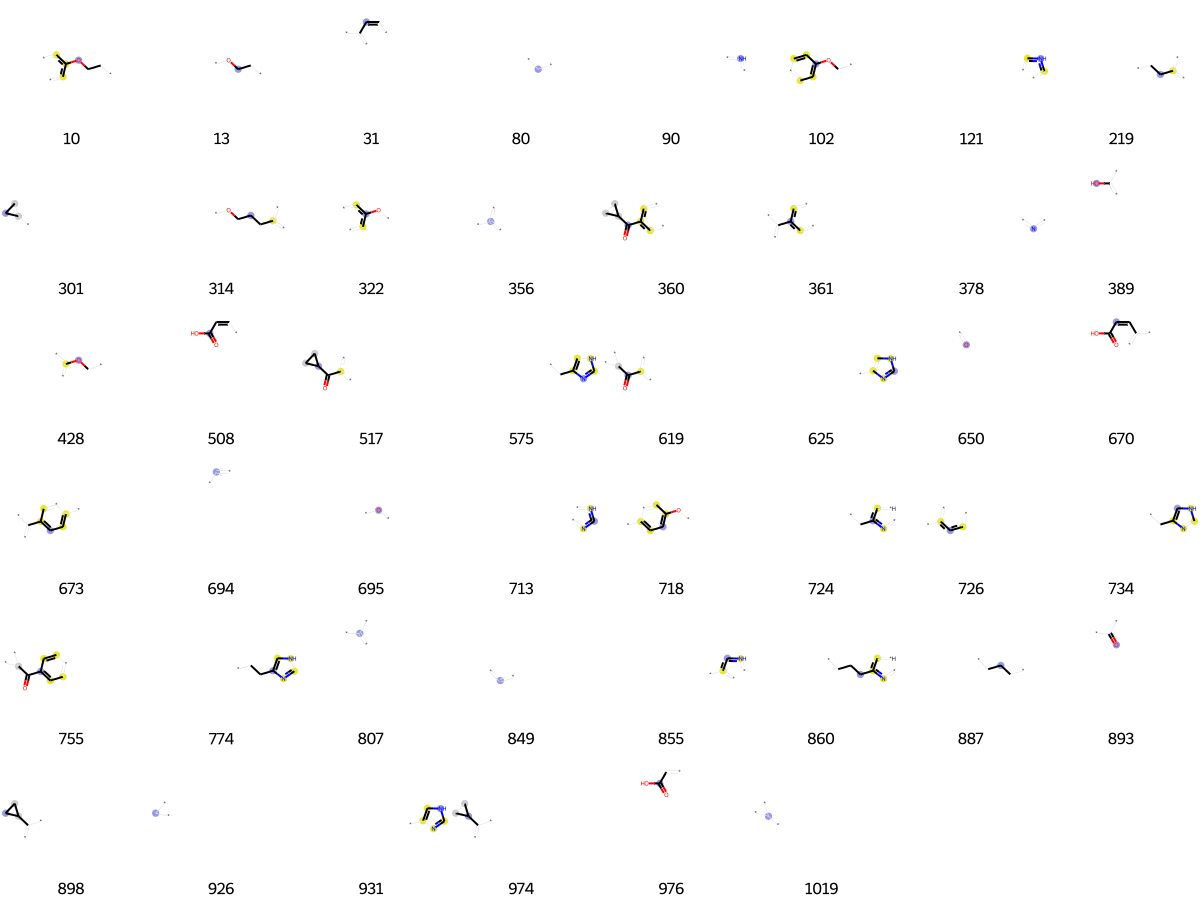

In [143]:
prints = [(M43, x, bi) for x in fp43.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp43.GetOnBits ()])

In [144]:
bi = {}

fp44= AllChem.GetMorganFingerprintAsBitVect(M44, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp44, fp_arr)
np.nonzero(fp_arr)
list(fp44.GetOnBits())

[4,
 33,
 80,
 90,
 121,
 153,
 294,
 301,
 314,
 339,
 356,
 360,
 378,
 455,
 469,
 504,
 506,
 537,
 650,
 659,
 672,
 690,
 721,
 771,
 772,
 794,
 802,
 820,
 831,
 890,
 916,
 919,
 926,
 935,
 976,
 1019]

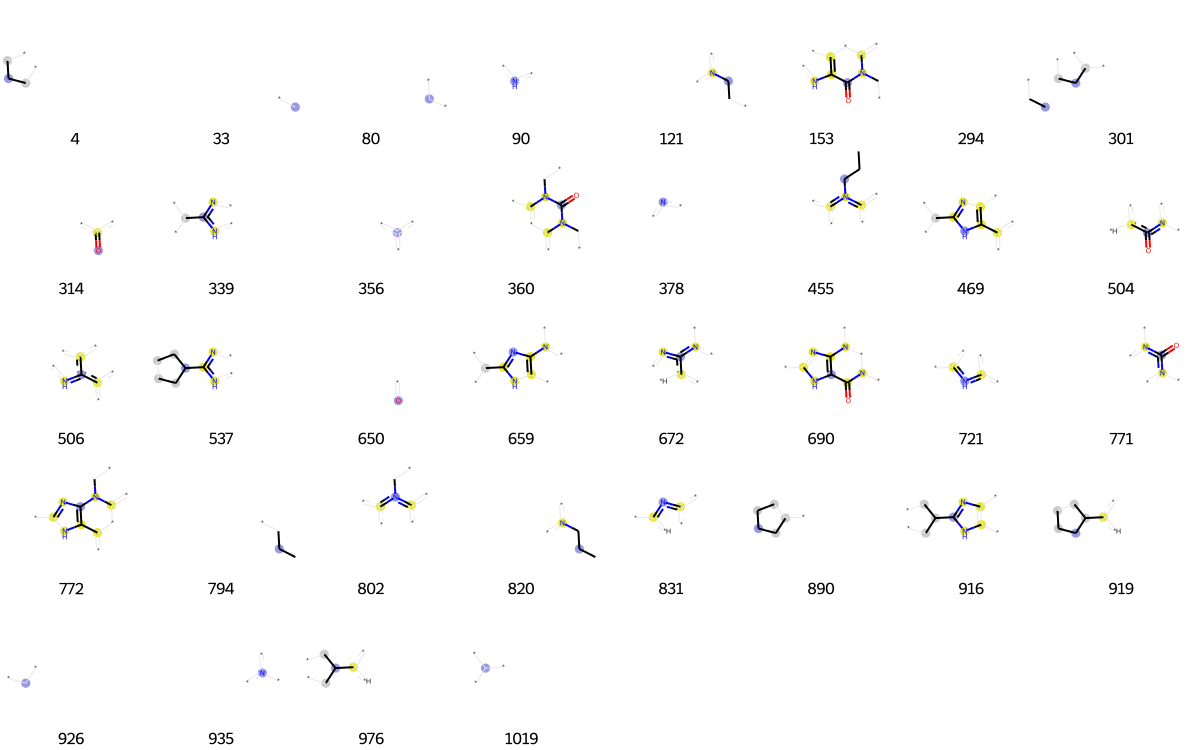

In [145]:
prints = [(M44, x, bi) for x in fp44.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp44.GetOnBits ()])

In [146]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[15,
 33,
 62,
 64,
 75,
 80,
 116,
 128,
 200,
 208,
 218,
 237,
 252,
 341,
 356,
 365,
 367,
 378,
 389,
 396,
 491,
 561,
 590,
 642,
 650,
 659,
 672,
 698,
 713,
 726,
 734,
 807,
 831,
 833,
 834,
 844,
 849,
 852,
 862,
 875,
 893,
 911,
 935,
 975]

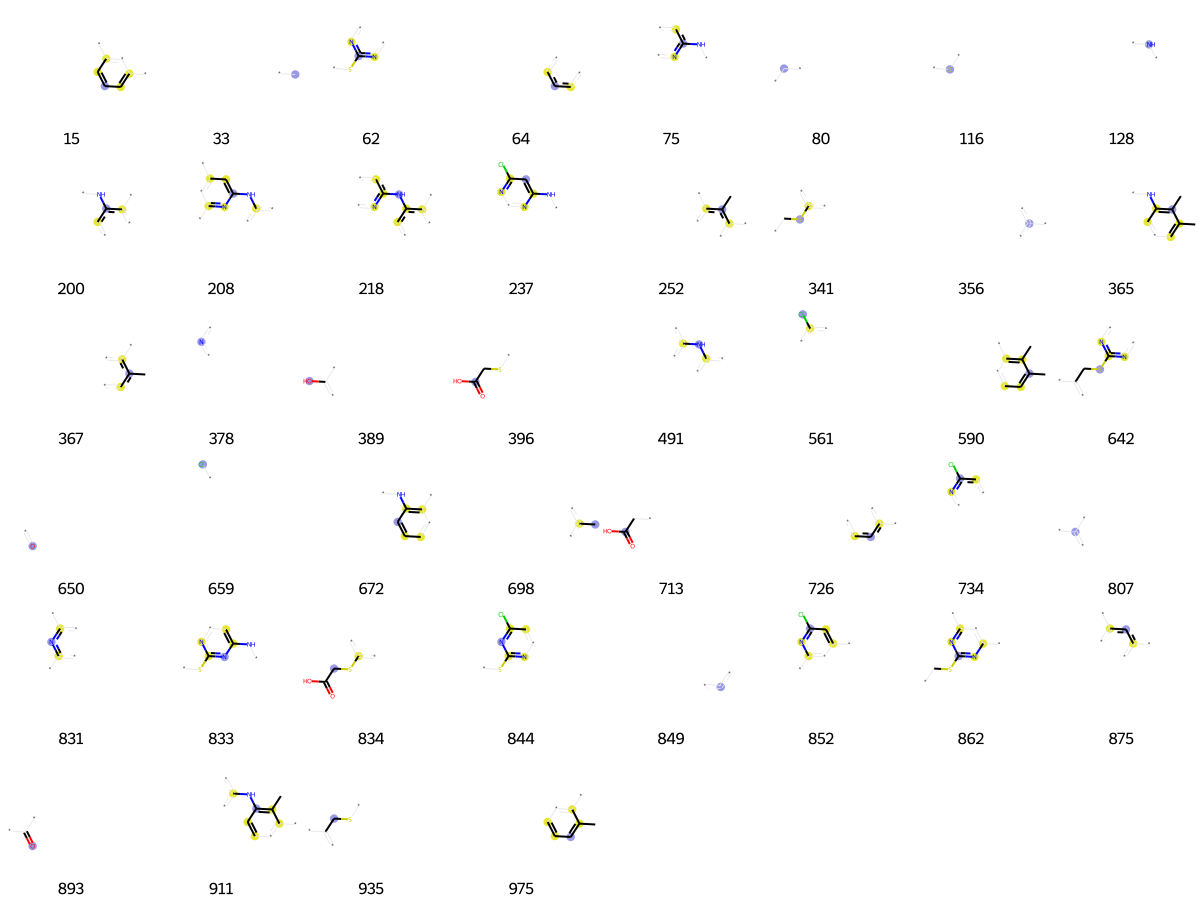

In [147]:
prints = [(M45, x, bi) for x in fp45.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp45.GetOnBits ()])

In [148]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[5,
 33,
 39,
 41,
 61,
 80,
 89,
 105,
 116,
 121,
 128,
 139,
 140,
 147,
 150,
 158,
 186,
 228,
 232,
 233,
 240,
 255,
 257,
 259,
 314,
 325,
 329,
 341,
 356,
 378,
 387,
 389,
 417,
 433,
 456,
 470,
 472,
 484,
 500,
 514,
 543,
 552,
 647,
 650,
 652,
 658,
 664,
 675,
 693,
 698,
 720,
 724,
 747,
 753,
 759,
 762,
 774,
 807,
 818,
 831,
 849,
 859,
 872,
 881,
 882,
 890,
 893,
 898,
 926,
 927,
 935,
 936,
 998,
 1019]

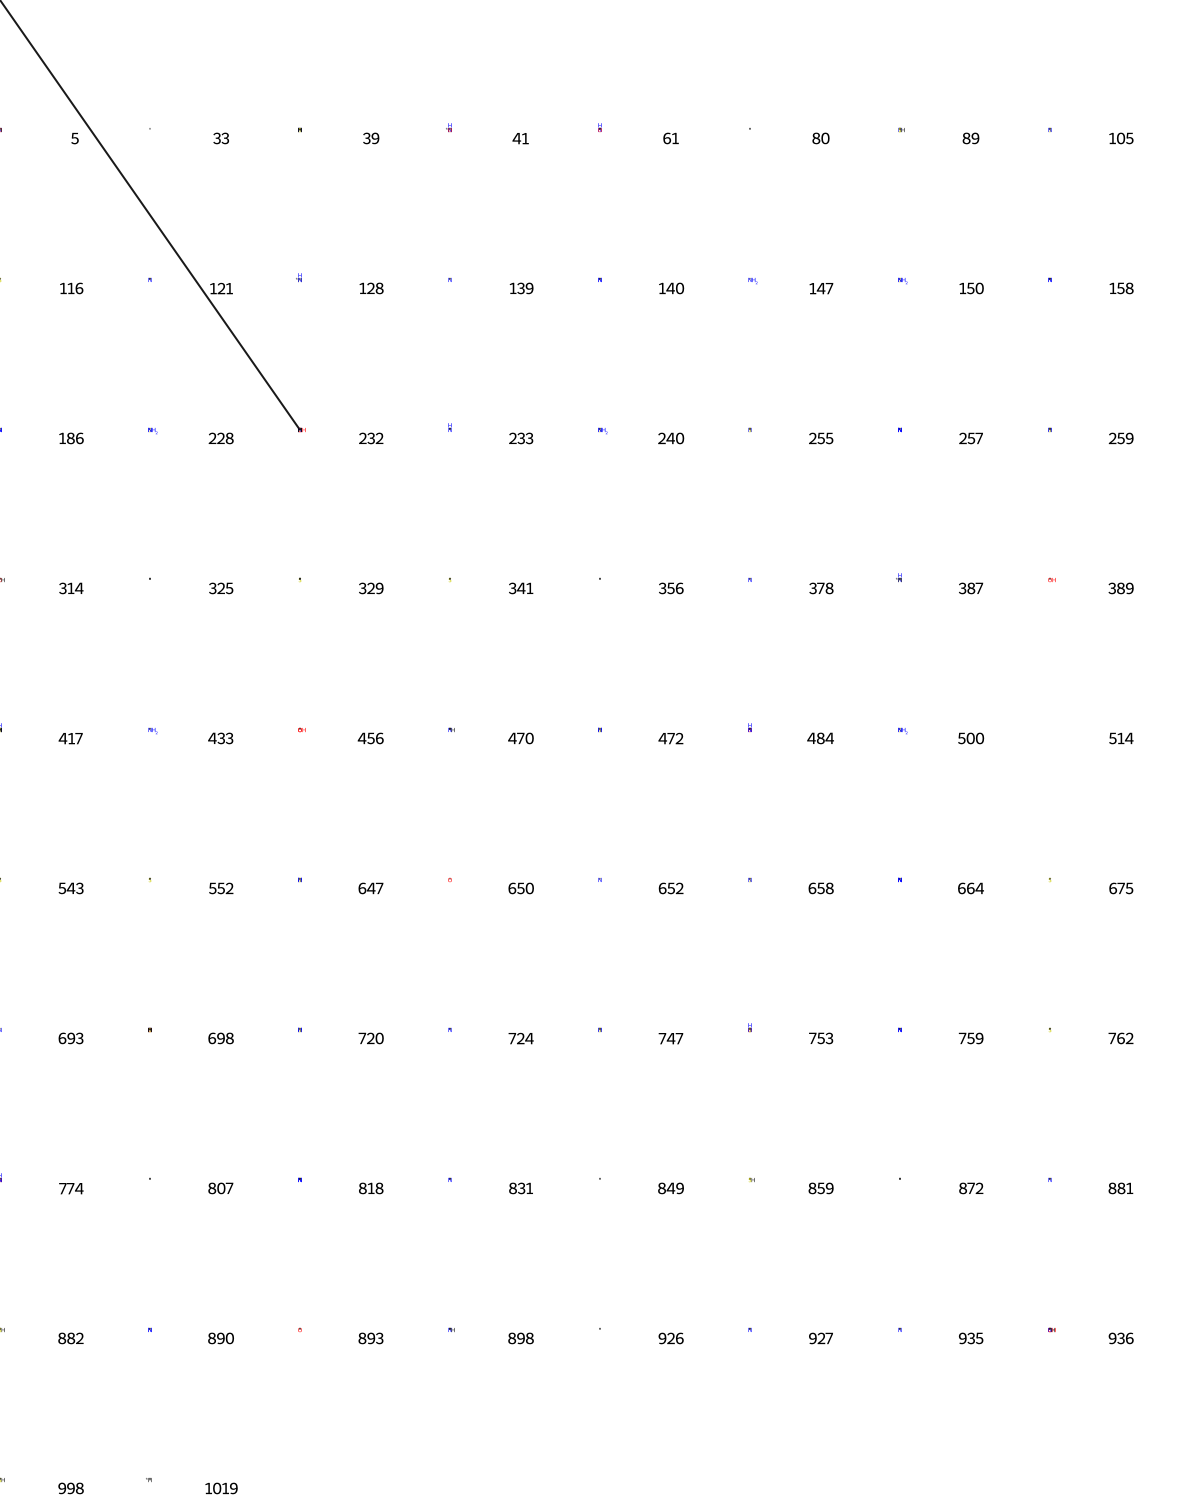

In [149]:
prints = [(M46, x, bi) for x in fp46.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp46.GetOnBits ()])

In [150]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[8,
 33,
 41,
 64,
 80,
 119,
 128,
 147,
 175,
 197,
 200,
 235,
 243,
 265,
 356,
 358,
 361,
 433,
 486,
 494,
 540,
 592,
 641,
 650,
 667,
 672,
 673,
 694,
 698,
 726,
 792,
 799,
 807,
 816,
 849,
 852,
 887,
 893,
 896,
 910,
 924,
 999]

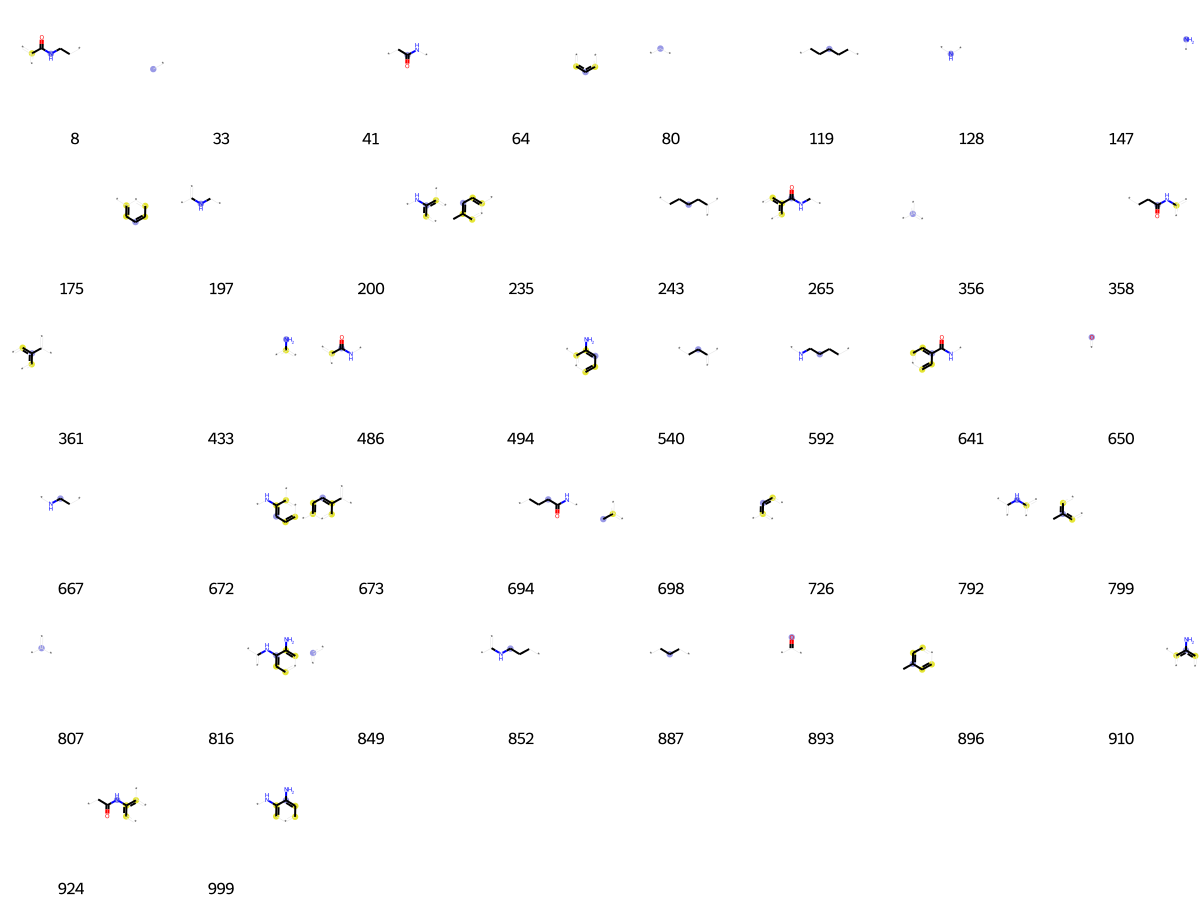

In [151]:
prints = [(M47, x, bi) for x in fp47.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp47.GetOnBits ()])

In [155]:
bi = {}

fp48= AllChem.GetMorganFingerprintAsBitVect(M48, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp48, fp_arr)
np.nonzero(fp_arr)
list(fp48.GetOnBits())

[3,
 4,
 15,
 18,
 33,
 36,
 80,
 136,
 138,
 146,
 162,
 173,
 181,
 212,
 228,
 231,
 288,
 292,
 301,
 319,
 325,
 340,
 356,
 366,
 378,
 428,
 456,
 464,
 489,
 490,
 571,
 602,
 636,
 637,
 638,
 650,
 675,
 698,
 707,
 713,
 714,
 721,
 724,
 726,
 734,
 751,
 760,
 764,
 786,
 806,
 807,
 821,
 830,
 831,
 849,
 859,
 875,
 893,
 896,
 902,
 920,
 926,
 935,
 938,
 980,
 985,
 1009,
 1019]

In [157]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[3,
 15,
 33,
 64,
 94,
 108,
 121,
 135,
 212,
 233,
 249,
 273,
 307,
 314,
 325,
 333,
 356,
 441,
 456,
 486,
 512,
 514,
 517,
 575,
 612,
 613,
 636,
 649,
 650,
 656,
 695,
 714,
 723,
 726,
 728,
 738,
 750,
 776,
 817,
 839,
 841,
 849,
 864,
 875,
 881,
 926,
 935,
 946,
 956,
 969,
 1019]

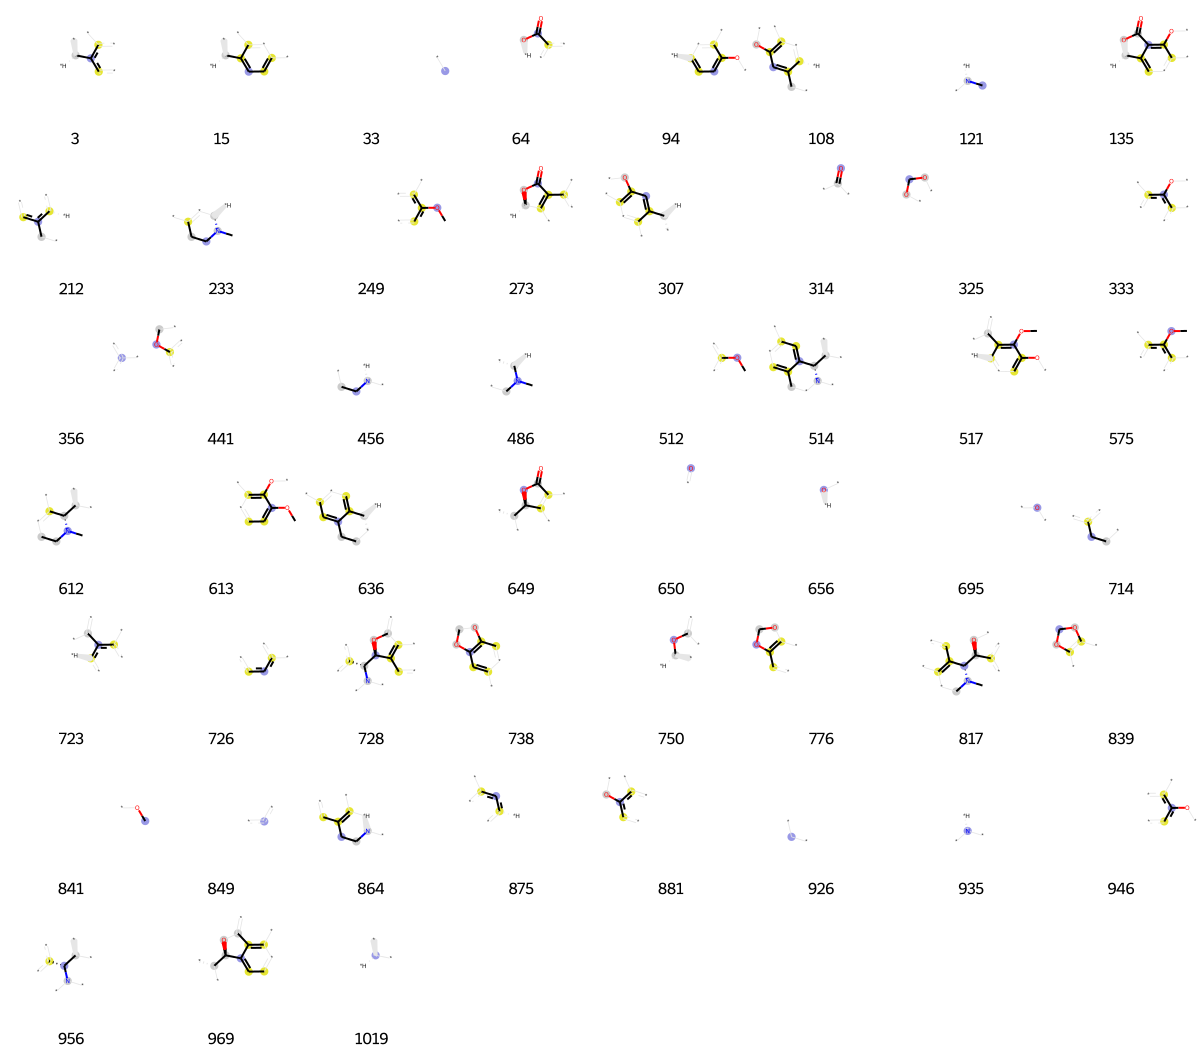

In [158]:
prints = [(M49, x, bi) for x in fp49.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp49.GetOnBits ()])

In [159]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[64,
 73,
 90,
 119,
 136,
 175,
 180,
 260,
 319,
 350,
 356,
 378,
 389,
 430,
 452,
 456,
 504,
 535,
 585,
 592,
 626,
 650,
 674,
 715,
 721,
 726,
 736,
 788,
 807,
 831,
 849,
 875,
 915,
 1022]

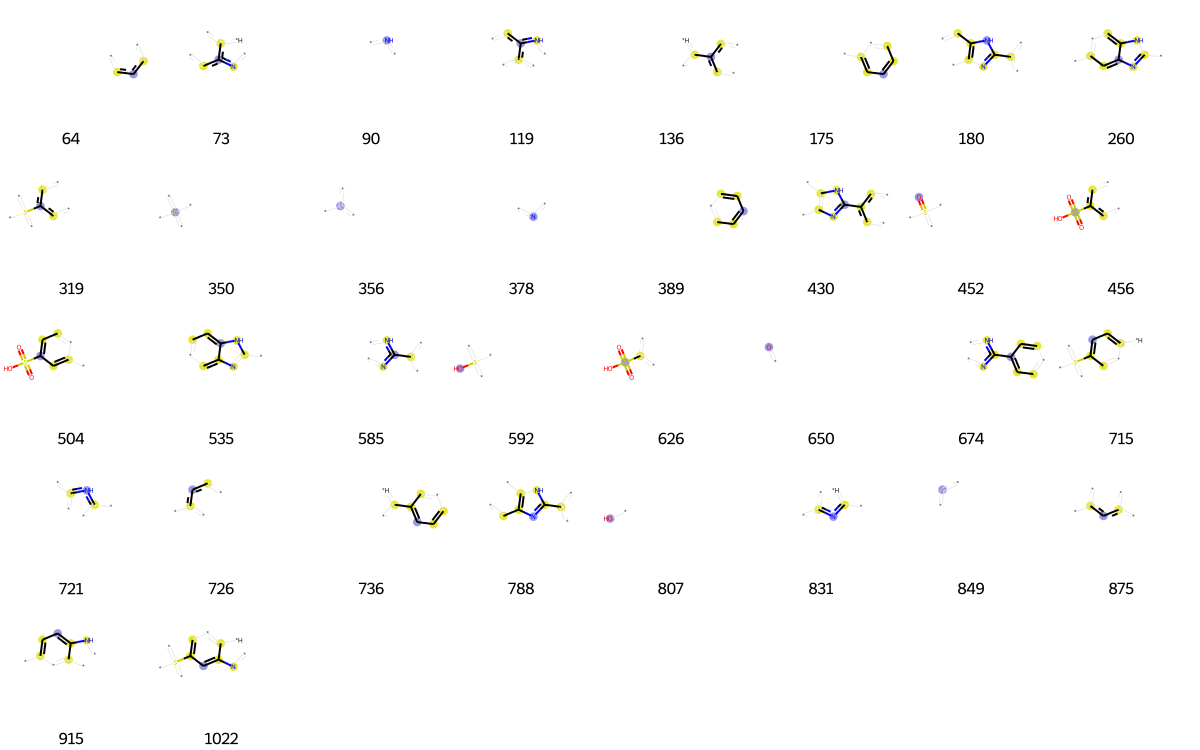

In [160]:
prints = [(M50, x, bi) for x in fp50.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp50.GetOnBits ()])